In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# <font color ='teal'> Medical Insurance Forecast Using Linear Regression
------
#### <font color = 'orange'> - Accurately predict insurance costs.

#### Data Dictionary
-------
###### <font color = 'orange'> - **age**: age of primary beneficiary <br> - **sex**: insurance contractor gender, female, male <br> - **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height <br> - **children**: Number of children covered by health insurance / Number of dependents <br> - **smoker**: Smoking <br> - **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br> - **charges**: Individual medical costs billed by health insurance

In [3]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df2 = df.copy()

#### Data Preprocessing

In [6]:
print(df2.shape)
print(df2.dtypes)

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


###### <font color ='orange'> 1338 rows and 7 columns. <br> 4 numerical columns and 3 categorical columns.

In [7]:
df2.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df2.duplicated().sum()

1

In [9]:
df2.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### EDA

In [10]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df2.charges.describe().round(1)

count     1338.0
mean     13270.4
std      12110.0
min       1121.9
25%       4740.3
50%       9382.0
75%      16639.9
max      63770.4
Name: charges, dtype: float64

##### <font color ='orange'> - The median cost of the medical insurance in the dataset is 13270 <br> - The lower quartile medical insurance cost was 4740 while the upper quartile is 16639.

In [12]:
num = df2[['age', 'bmi', 'children', 'charges']]
num.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


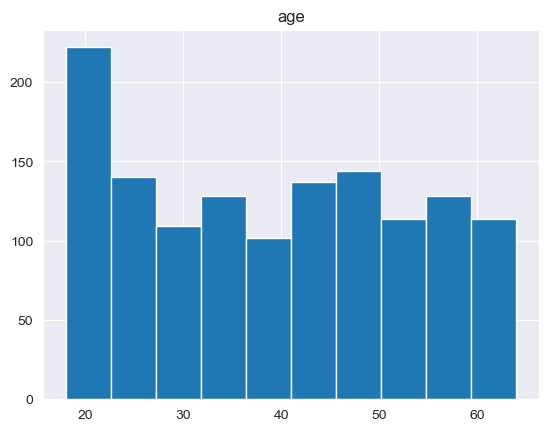

<Figure size 1200x500 with 0 Axes>

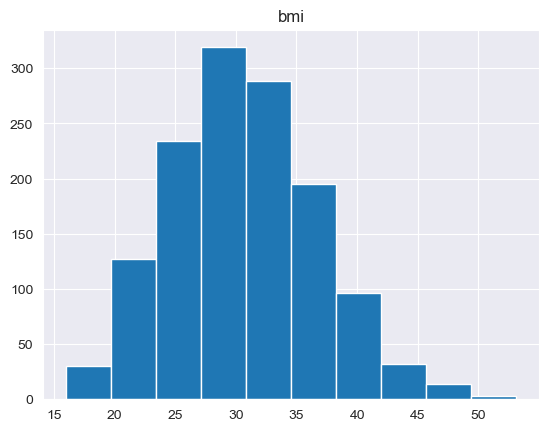

<Figure size 1200x500 with 0 Axes>

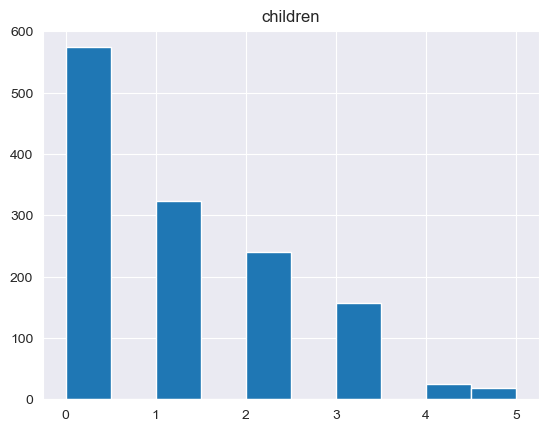

<Figure size 1200x500 with 0 Axes>

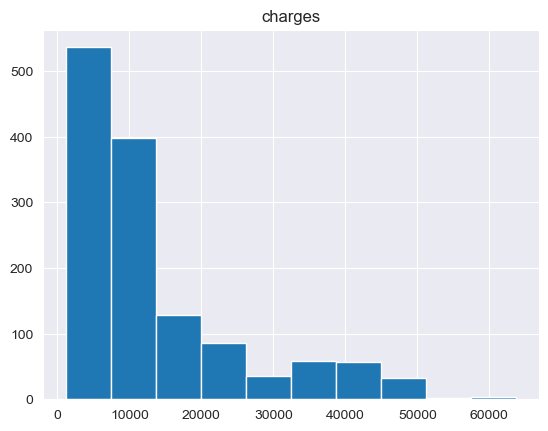

<Figure size 1200x500 with 0 Axes>

In [43]:
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.figure(figsize=(12,5))
    plt.show()


#### Average insurance cost by age.

In [44]:
age_char = df2.groupby('age')['charges'].mean()
age_char

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

In [45]:
age_char.sort_values(ascending = False)

age
64    23275.530837
61    22024.457609
60    21979.418507
63    19884.998461
43    19267.278653
62    19163.856573
59    18895.869532
54    18758.546475
52    18256.269719
37    18019.911877
47    17653.999593
57    16447.185250
55    16164.545488
53    16020.930755
44    15859.396587
51    15682.255867
50    15663.003301
56    15025.515837
45    14830.199856
48    14632.500445
46    14342.590639
58    13878.928112
42    13061.038669
30    12719.110358
49    12696.006264
23    12419.820040
33    12351.532987
36    12204.476138
27    12184.701721
39    11778.242945
40    11772.251310
34    11613.528121
35    11307.182031
24    10648.015962
29    10430.158727
31    10196.980573
20    10159.697736
22    10012.932802
25     9838.365311
19     9747.909335
41     9653.745650
32     9220.300291
28     9069.187564
38     8102.733674
18     7086.217556
26     6133.825309
21     4730.464330
Name: charges, dtype: float64

###### <font color='orange'> The higher in age the higher the costs

<Axes: xlabel='age'>

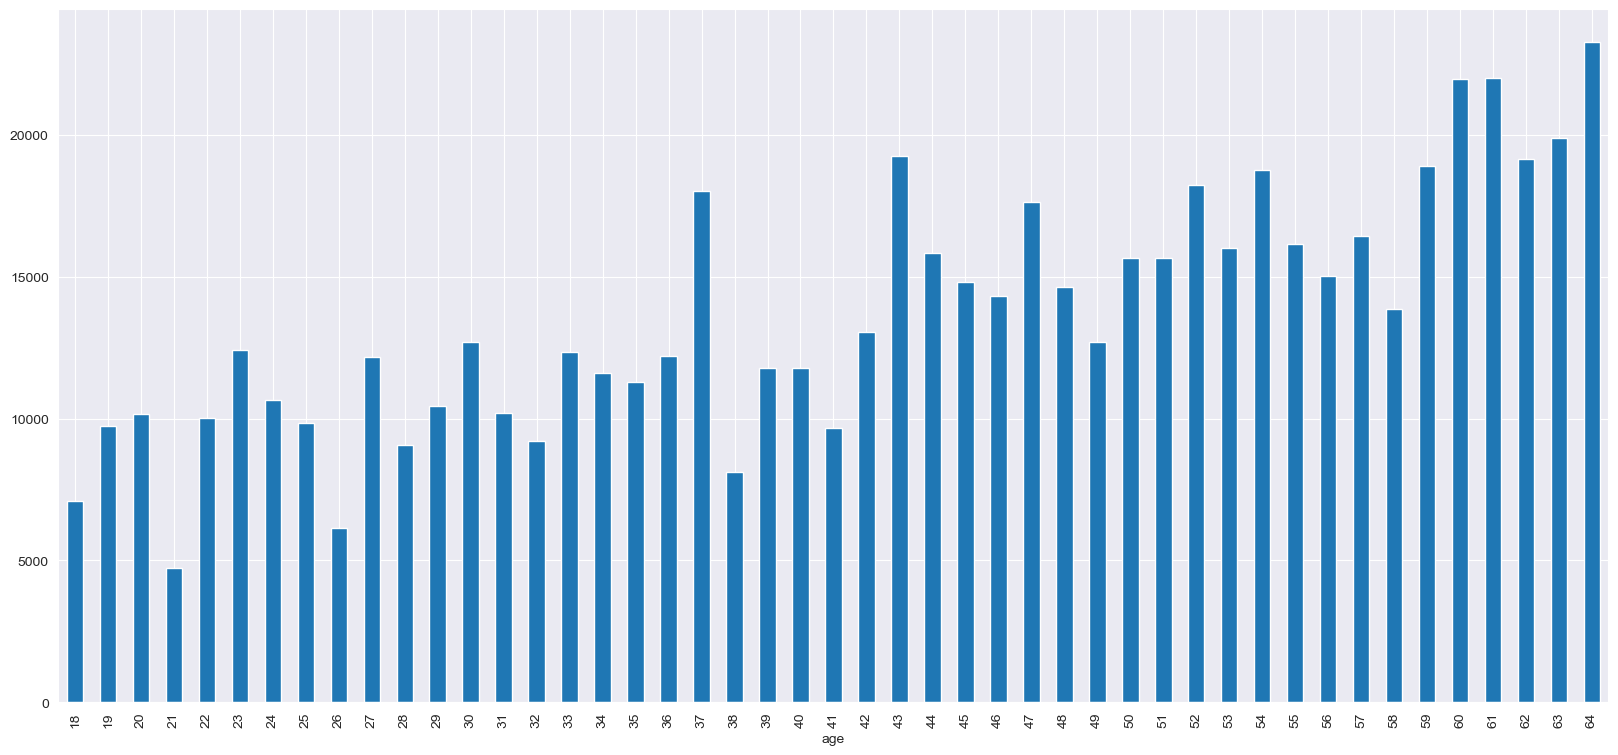

In [46]:
age_char.plot(x = 'age', y = 'charges', kind = 'bar', fontsize = 10, figsize=(20,9))

#### Average insurance cost based on the number of children covered under the policy.

In [47]:
df2.children.value_counts()#normalize = True)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

###### <font color = 'orange'> - 42% of individuals in the dataset have 0 children <br> - 24% have 1 child <br> - 17% have 2 <br> - 11% have 3 <br> - Less than 13% have 3 or more children.

In [48]:
chld_char = df2.groupby('children')['charges'].mean().sort_values(ascending = False)
chld_char

children
3    15355.318367
2    15073.563734
4    13850.656311
1    12731.171832
0    12365.975602
5     8786.035247
Name: charges, dtype: float64

<Axes: xlabel='children'>

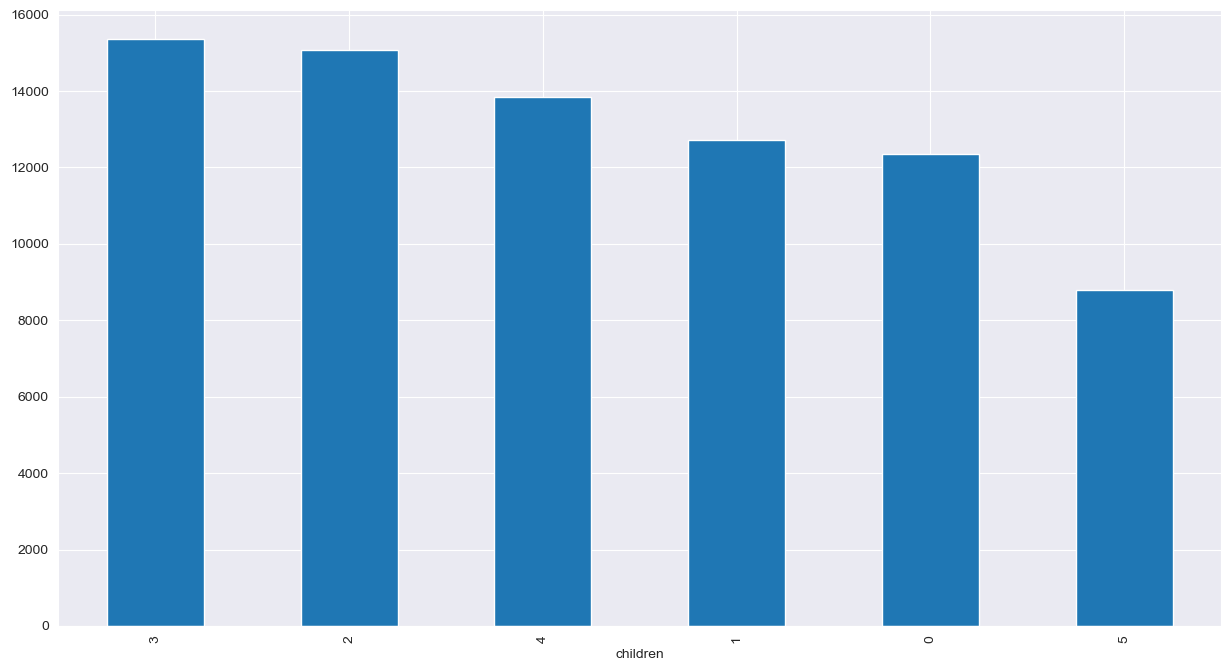

In [49]:
chld_char.plot(x = 'children', y = 'charges', kind = 'bar', fontsize = 10, figsize = (15,8))

###### <font color ='orange'> - Individuals with 2 or 3 children covered incurred the highest charges while individuals with 5 children incurred the lowest charges. <br> - Individuals with 0 or 1 child covered incurred similar insurance costs.

In [50]:
df2.groupby('children')['age', 'charges'].mean()

,age,charges
children,,
0,38.444251,12365.975602
1,39.453704,12731.171832
2,39.445833,15073.563734
3,41.566879,15355.318367
4,39.000000,13850.656311
5,35.611111,8786.035247


#### Average insurance charge based on BMI

In [51]:
df2.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

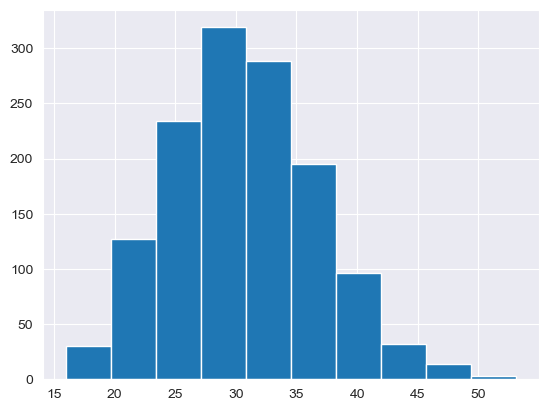

In [52]:
plt.hist(df2.bmi)

###### <font color = 'orange'> BMI is normally distributed.

In [53]:
df2['bmi_cat'] = df2.apply(lambda x:'15-29' if x['bmi'] <= 29 else \
    '30-40' if ((x['bmi'] >= 30) & (x['bmi'] <=40)) else \
    '41-55' if ((x['bmi'] >= 41) & (x['bmi'] <= 55)) else '56+', axis =1)
df2['bmi_cat'].value_counts()

30-40    616
15-29    560
56+       94
41-55     68
Name: bmi_cat, dtype: int64

In [54]:
df2.groupby('bmi_cat')['charges'].mean()

bmi_cat
15-29    10728.887802
30-40    15370.294094
41-55    17137.706714
56+      11853.006419
Name: charges, dtype: float64

###### <font color = 'orange'> Individuals whose BMI falls within the range of 41 to 55 had the highest average insurance cost, whereas individuals with a BMI greater than 56 had the lowest average insurance cost.

#### Average insurance cost based on sex

male      676
female    662
Name: sex, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

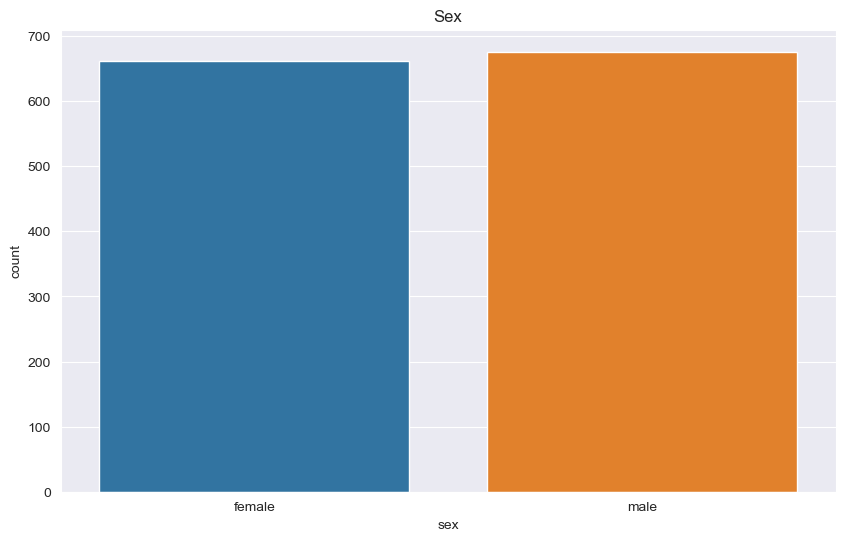

In [55]:
sex = df2['sex'].value_counts()
print(sex)
plt.figure(figsize=(10, 6))
sns.countplot(x = 'sex', data = df2)
plt.title('Sex')
plt.show

In [56]:
df2.groupby('sex')['charges'].mean().round(0)

sex
female    12570.0
male      13957.0
Name: charges, dtype: float64

###### <font color ='orange'> The average insurance cost for men is higher (13,957) than that of women (12,570).

In [57]:
df2.groupby('sex')['age', 'bmi', 'charges'].mean().round(0)

,age,bmi,charges
sex,,,
female,40.0,30.0,12570.0
male,39.0,31.0,13957.0


###### <font color ='orange'> Men (13957) pay higher insurance costs than women (12570) on average. <br> Men (31) also have a higher bmi average than women (30)

#### Insurance cost based on smoking

In [58]:
df2['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

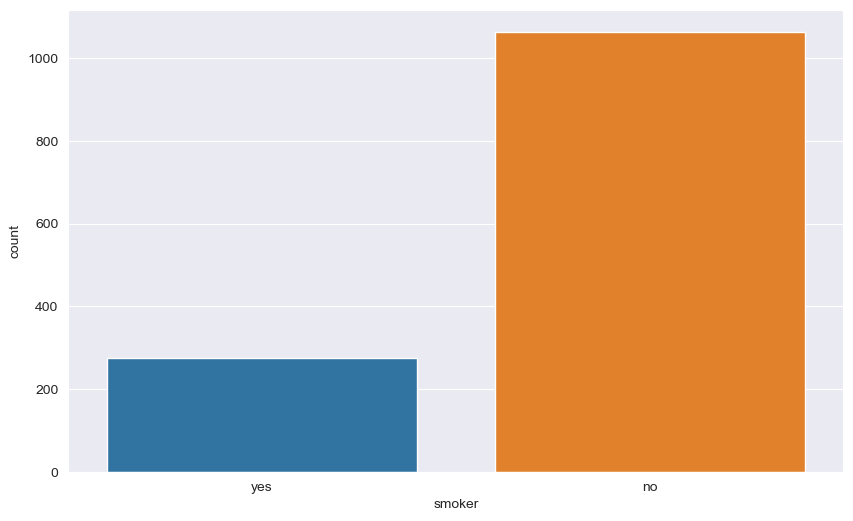

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'smoker', data = df2)

In [60]:
df2.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

###### <font color = 'orange'> Individuals who smoke incur a higher insurance cost compared to individuals who do not smoke.

In [61]:
pd.crosstab(df2.sex, df2.smoker)

smoker,no,yes
sex,,
female,547,115
male,517,159


###### <font color ='orange'> Men have a higher smoking rate than women in this dataset.


#### Average insurance cost based on region

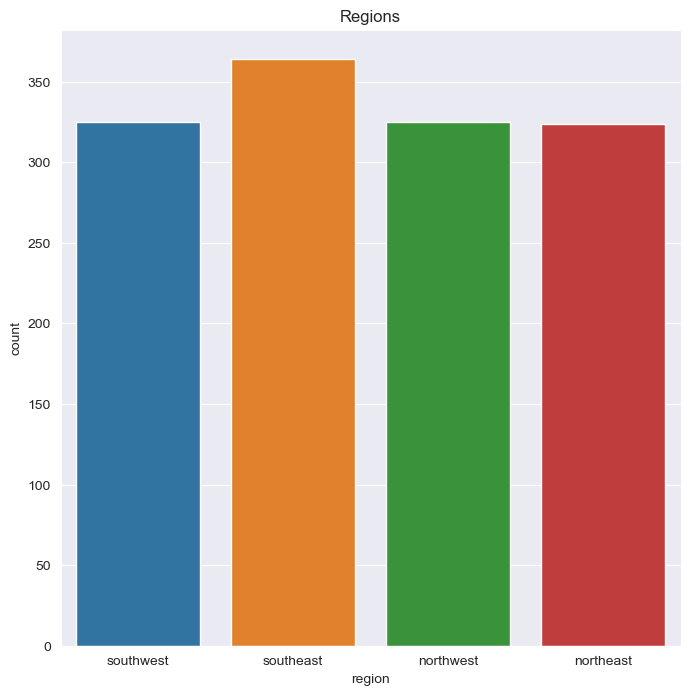

In [62]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'region', data = df2)
plt.title('Regions')
plt.show()

region
southeast    14735.0
northeast    13406.0
northwest    12418.0
southwest    12347.0
Name: charges, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Average insurance charges based on region'}, xlabel='region'>

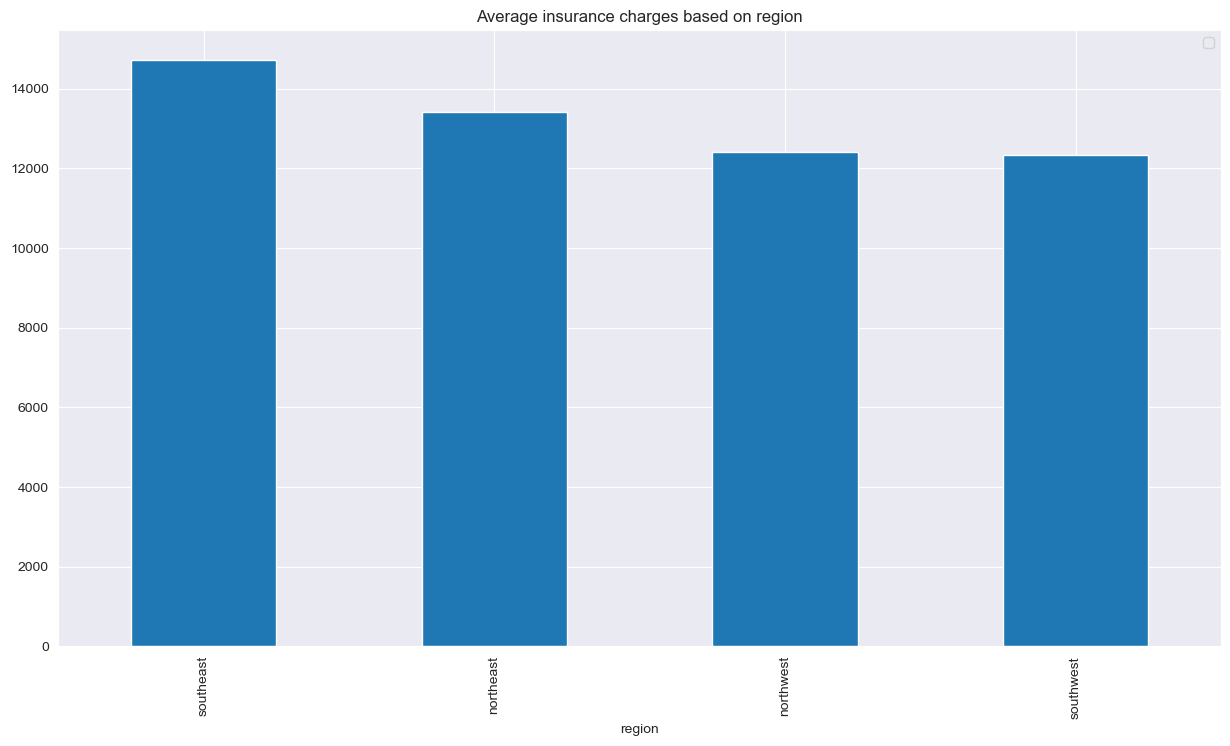

In [63]:
region = df2.groupby('region')['charges'].mean().round(0).sort_values(ascending = False)
print(region)
plt.title('Average insurance charges based on region')
plt.legend()
region.plot(kind = 'bar', figsize=(15,8))

###### <font color = 'orange'> The Southeast region has the highest average insurance costs, followed by the Northeast, Northwest, and Southwest regions.

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

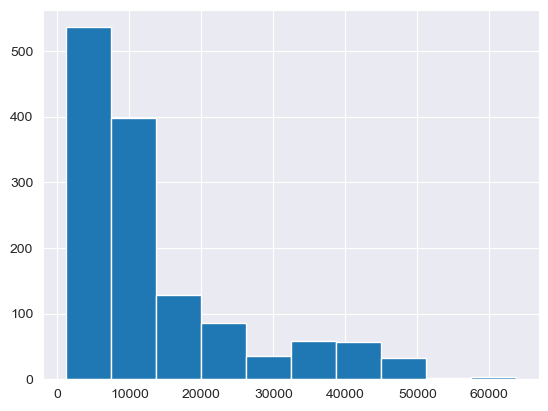

In [64]:
plt.hist(df2.charges)

In [65]:
df2.charges.describe().round(0)

count     1338.0
mean     13270.0
std      12110.0
min       1122.0
25%       4740.0
50%       9382.0
75%      16640.0
max      63770.0
Name: charges, dtype: float64

In [66]:
df2['reg_char'] = df2.apply(lambda x: '<9382' if x['charges'] < 9382 else \
    '9383-13270' if ((x['charges'] >= 9383) & (x['charges'] <= 13270)) else \
    '13271-16640' if ((x['charges'] >= 13271) & (x['charges'] <= 16640)) else \
    '16641-20000' if ((x['charges'] >= 16641) & (x['charges'] <= 20000)) else '20000+', axis = 1)
df2['reg_char'].value_counts()

<9382          669
20000+         273
9383-13270     249
13271-16640     85
16641-20000     62
Name: reg_char, dtype: int64

In [67]:
pd.crosstab(df2.region, df2.reg_char)

reg_char,13271-16640,16641-20000,20000+,9383-13270,<9382
region,,,,,
northeast,27,14,68,69,146
northwest,22,13,61,61,168
southeast,18,24,88,50,184
southwest,18,11,56,69,171


#### Dummifying 'Sex' and 'Smoker' columns.

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [6]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(handle_unknown='ignore')
#ohe.fit(df)
#df3 = ohe.transform()
df3 = pd.get_dummies(df, columns = ['region'])
df3

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


###### <font color = 'orange'> Female = 0 <br> Male = 1 <br> Smoker = 1 <br> Non-smoker = 0

<Axes: >

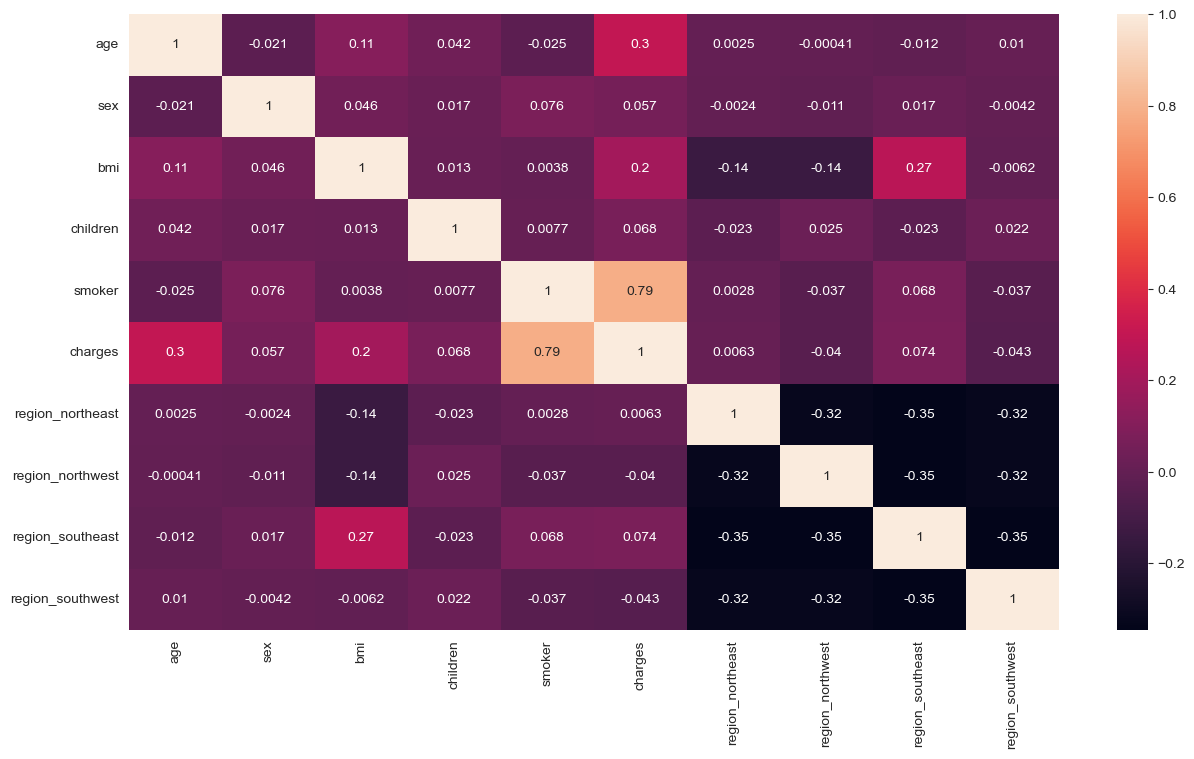

In [70]:
a = df3.corr()
plt.figure(figsize=(15,8))
sns.heatmap(a, annot = True)

###### <font color = 'orange'> - There is a high correlation between individuals who smoke and high insurance costs (0.79) <br> - As well as between age and insurance cost (0.3) <br> - Between BMI and insurance cost (0.2)

## Model Building
-----
#### Linear Regression

In [7]:
df3.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [8]:
X = df3[['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast',
         'region_northwest', 'region_southeast', 'region_southwest']]
y = df3[['charges']]

In [9]:
#y = np.array(y).reshape(-1,1)
#type(y)

In [10]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#scaled_df = sc.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_train.shape, X_test.shape

((936, 9), (402, 9))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
print(X_train.shape)
print(X_test.shape)

(936, 9)
(402, 9)


In [16]:
model = []
test_score = []

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.predict(X_test)

array([[ 3631.07353341],
       [ 3751.78008957],
       [ 7884.48292071],
       [ 2590.98222894],
       [23629.05394707],
       [36202.28537664],
       [14987.47871047],
       [ 2935.52806517],
       [27897.68880837],
       [15655.14027775],
       [15099.56983694],
       [ 4611.08134923],
       [11357.6378411 ],
       [ 4535.17416518],
       [ 8563.96298897],
       [29860.35763502],
       [11423.18953817],
       [12029.19790063],
       [ 6039.03701055],
       [17982.36548396],
       [13862.53876426],
       [ 2086.76061077],
       [ 6206.73332367],
       [30681.39145667],
       [13454.65233823],
       [31501.67697377],
       [ 6819.16455767],
       [38825.90268914],
       [30259.1427717 ],
       [13109.06069438],
       [18062.54744949],
       [ 2668.04541777],
       [38419.9010865 ],
       [25656.67098582],
       [ 7635.36262312],
       [11479.85046171],
       [ 7961.41737364],
       [31867.4327798 ],
       [ 4257.20498766],
       [36867.73722617],


In [19]:
model.append('Linear Regression')
print("Linear Regression Train Score is : ", lr.score(X_train, y_train))
print("Linear Regression Test Score is : " , lr.score(X_test, y_test))
test_score.append(lr.score(X_test, y_test))

Linear Regression Train Score is :  0.7378638257001522
Linear Regression Test Score is :  0.7790024672289594


## Decison Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()#max_depth=5)
dt.fit(X_train, y_train)
#model.append('dt')
print('DecisionTreeRegressor Train Score is: ', dt.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is: ', dt.score(X_test, y_test))
#test_score.append(dt.score(X_test, y_test))

DecisionTreeRegressor Train Score is:  0.9986693373529103
DecisionTreeRegressor Test Score is:  0.6712428579018508


In [21]:
y_pred = dt.predict(X_test)
y_pred

array([ 1682.597  ,  4058.71245,  7419.4779 ,  1622.1885 , 16450.8947 ,
       30184.9367 , 13228.84695,  3925.7582 , 19361.9988 , 13429.0354 ,
        8068.185  ,  2464.6188 ,  8334.5896 ,  2352.96845,  8520.026  ,
       40932.4295 , 27346.04207, 11299.343  ,  4746.344  , 24227.33724,
       10594.2257 ,  1256.299  ,  7526.70645, 38245.59327,  9880.068  ,
       40419.0191 ,  2899.48935, 48173.361  , 22478.6    , 13555.0049 ,
       20462.99766,  1743.214  , 48173.361  , 34617.84065,  7256.7231 ,
       30166.61817,  3471.4096 , 39125.33225,  3857.75925, 62592.87309,
        7726.854  , 28476.73499,  2322.6218 ,  4753.6368 ,  1737.376  ,
        3757.8448 ,  4889.0368 ,  2719.27975,  1719.4363 , 28476.73499,
       14210.53595,  7526.70645,  4561.1885 ,  7256.7231 ,  7050.642  ,
       10704.47   ,  9144.565  , 38709.176  ,  6338.0756 , 10601.63225,
       26018.95052,  2254.7967 ,  4433.9159 ,  8116.68   , 11289.10925,
        1906.35825,  1737.376  ,  5012.471  ,  4673.3922 , 40419

#### Post pruning DT using cost complexity pruning
------
###### <font color = 'teal'> Decision Trees provide parameters such as min_samples_leaf and max_depth. <br> - max_depth is set on cost complexity pruning
###### <font color = 'orange'> Cost complexity pruning is method to control the size of a tree i.e overfiiting. <br> - Overfitting is when a model's training dataset has a high accuracy score while the test dataset has a low accuracy score. <br> - The model's performance on the training dataset improves at the expense of poor performance on training data, such as new data. <br> - Testing a model on both traning dataset and test dataset can convey if a model is overfitted.
* ######  <font color = 'orange'> The greater the cost complexity pruning parameter (cc_alpha), there's an increase in the number of nodes pruned. <br> cc_alpha is chose based on validation scores.

In [22]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
ccp_alphas

array([0.00000000e+00, 9.31474860e-06, 3.72589526e-05, 7.52404309e-05,
       9.28894208e-05, 1.12396201e-04, 1.49035918e-04, 1.49035919e-04,
       1.98714594e-04, 2.32868486e-04, 2.32868677e-04, 2.58026179e-04,
       4.49584807e-04, 4.49584808e-04, 4.56422502e-04, 5.05731354e-04,
       5.96143656e-04, 6.11934827e-04, 6.11934881e-04, 6.60547008e-04,
       6.98605868e-04, 7.99261887e-04, 8.36004808e-04, 9.31474472e-04,
       1.01156582e-03, 1.19105036e-03, 1.24884658e-03, 1.79833923e-03,
       1.82568998e-03, 1.82569001e-03, 2.01480599e-03, 2.09581782e-03,
       2.38457469e-03, 2.45259041e-03, 2.69196128e-03, 3.19704754e-03,
       3.60916693e-03, 4.04626327e-03, 4.99538672e-03, 4.99538674e-03,
       5.04393437e-03, 5.36529308e-03, 5.39501785e-03, 5.45983376e-03,
       6.04441797e-03, 6.29676757e-03, 7.69217313e-03, 7.74493088e-03,
       7.92656410e-03, 8.38327043e-03, 8.39569009e-03, 8.44220361e-03,
       1.17335167e-02, 1.41295134e-02, 1.65136752e-02, 1.73496800e-02,
      

###### <font color = 'orange'> cc_alphas can be put as parameters to the Decision Tree to decide the optimal depth for the model. <br>  cc_alphas find the weak points with respect to the nodes. <-br> - These values will then be stored in the form of lists. <br> Once weak points with respect to the node have been found <br> - iterate each cc_alpha in a Decision Tree Classifier/Regressor <br> - then fiit on x_train, y_train

In [24]:
# Decision Trees
dts = []
# cc_alphas can be put as parameter to the Decision Tree to decide the optimal depth for the model.
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)
    print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(dts[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1869 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1867 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1865 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1863 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1863 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1859 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1857 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1855 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1853 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1851 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1849 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1847 with ccp_alpha: 89820377.63749899
Number of nodes in the last tree is: 1847 with ccp_alpha: 89820377.63749899
Number of no

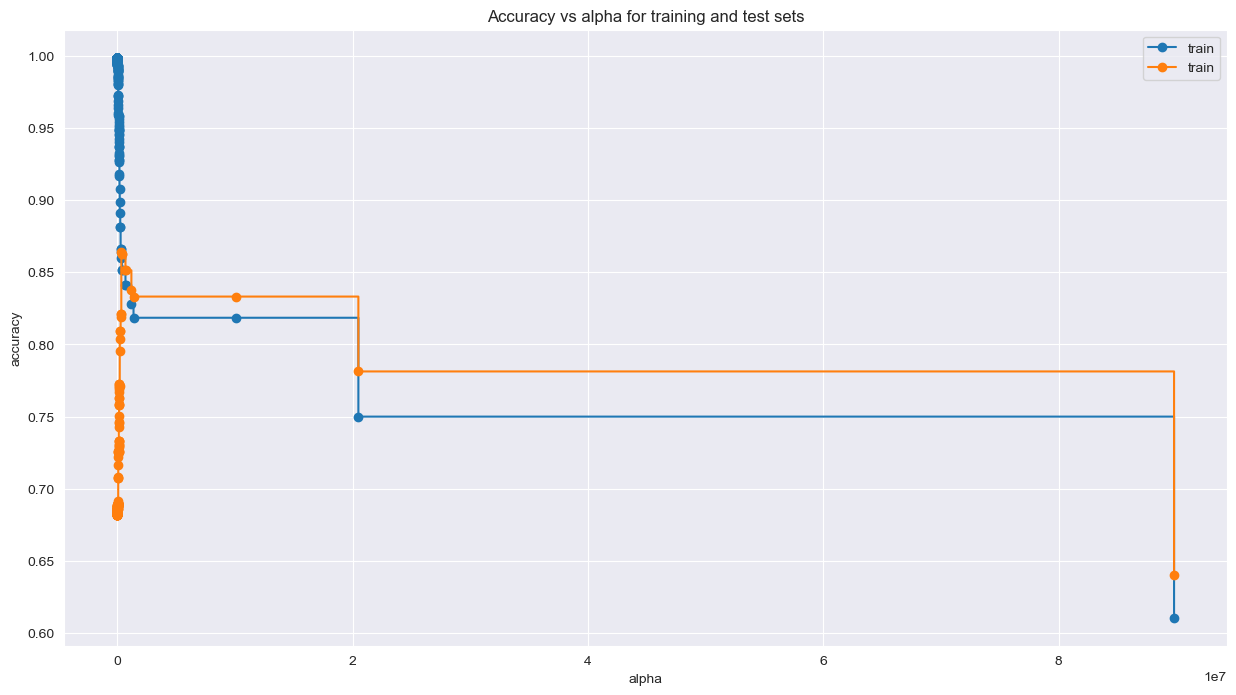

In [25]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots(figsize =(15,8))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and test sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.legend()
plt.show()

###### <font color = 'orange'> This tree overfits when ccp_alpha is set to zero which leads to s 100% training accuracy and 87% testing accuracy. <br> The more alpha increases, the more the tree is pruned, therefore making the decision generalize much better. <br> In this case, the testing accuracy is maximized when ccp_alpha = 0.012

In [26]:
dt = DecisionTreeRegressor(random_state=0, ccp_alpha = 0.012)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.012, random_state=0)

In [27]:
test_prediction = dt.predict(X_test)
train_prediction = dt.predict(X_train)
from sklearn.metrics import r2_score
print("Train Prediction Score is: ", r2_score(y_train, train_prediction))
print("Test Prediction Score is: ", r2_score(y_test, test_prediction))

Train Prediction Score is:  0.9986693363707482
Test Prediction Score is:  0.6829962203088686


###### <font color ='orange'> The Decision Tree Model is still overfitting when cc_alphas is set to 0.012. Therefore, it would be more effective to find the exact number of max_depth hyperparameter.

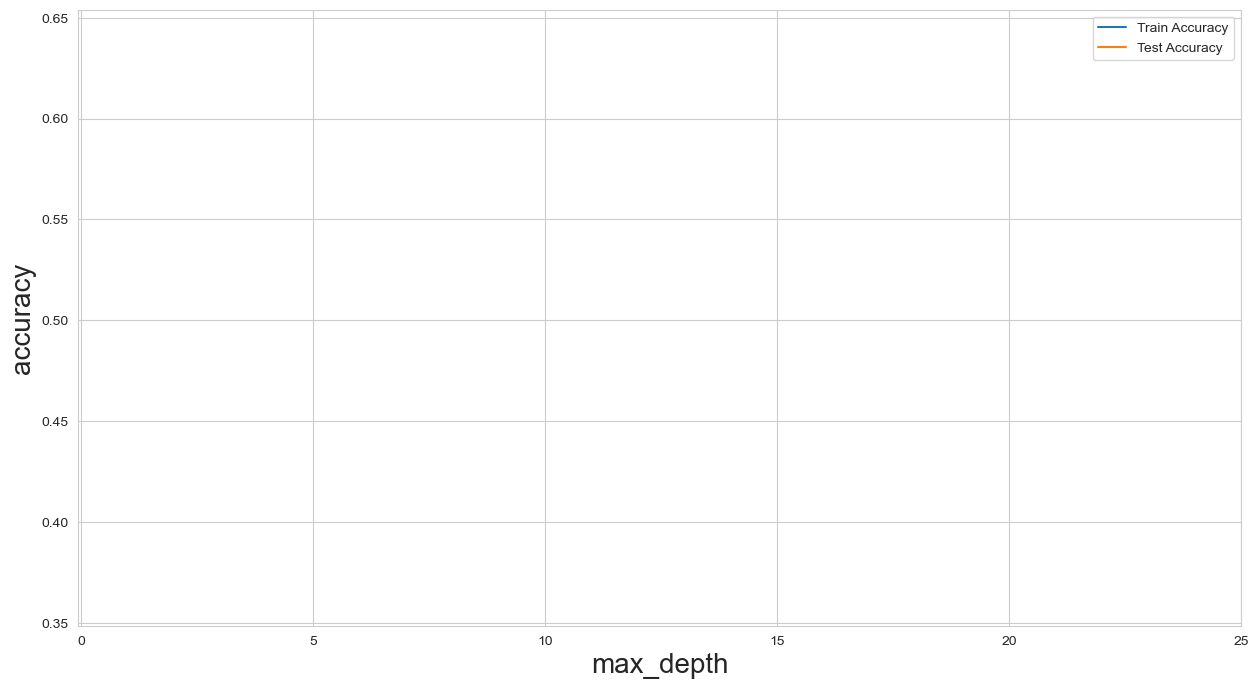

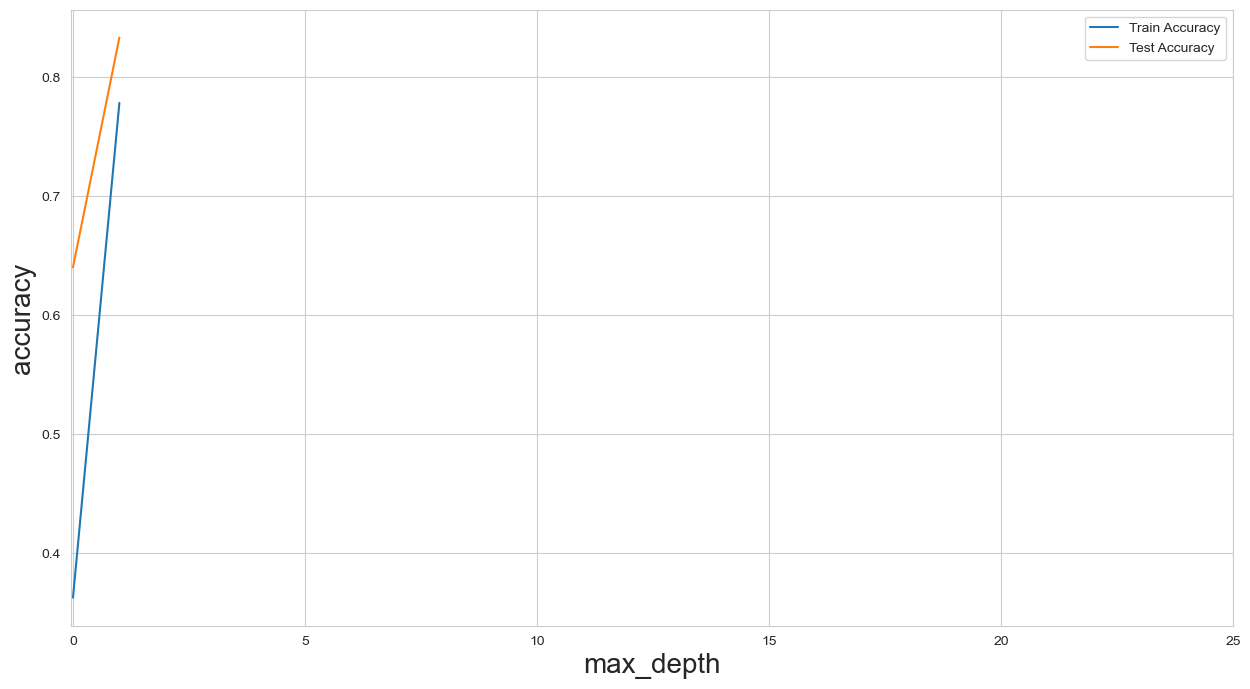

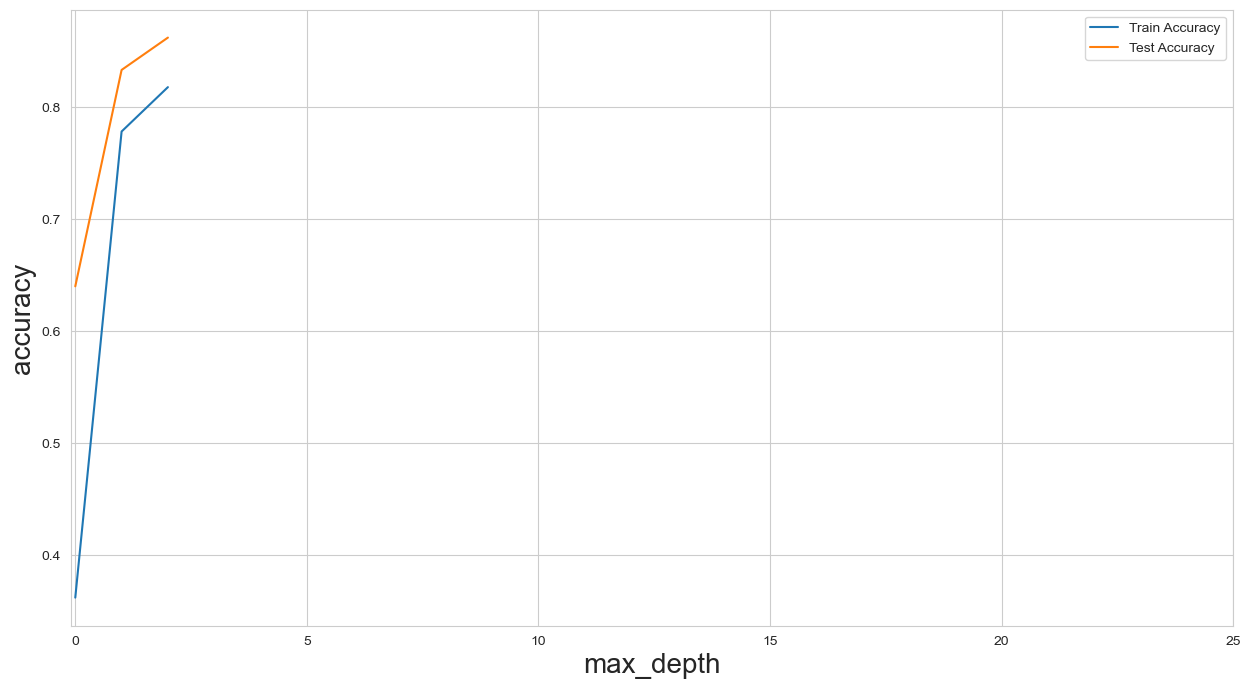

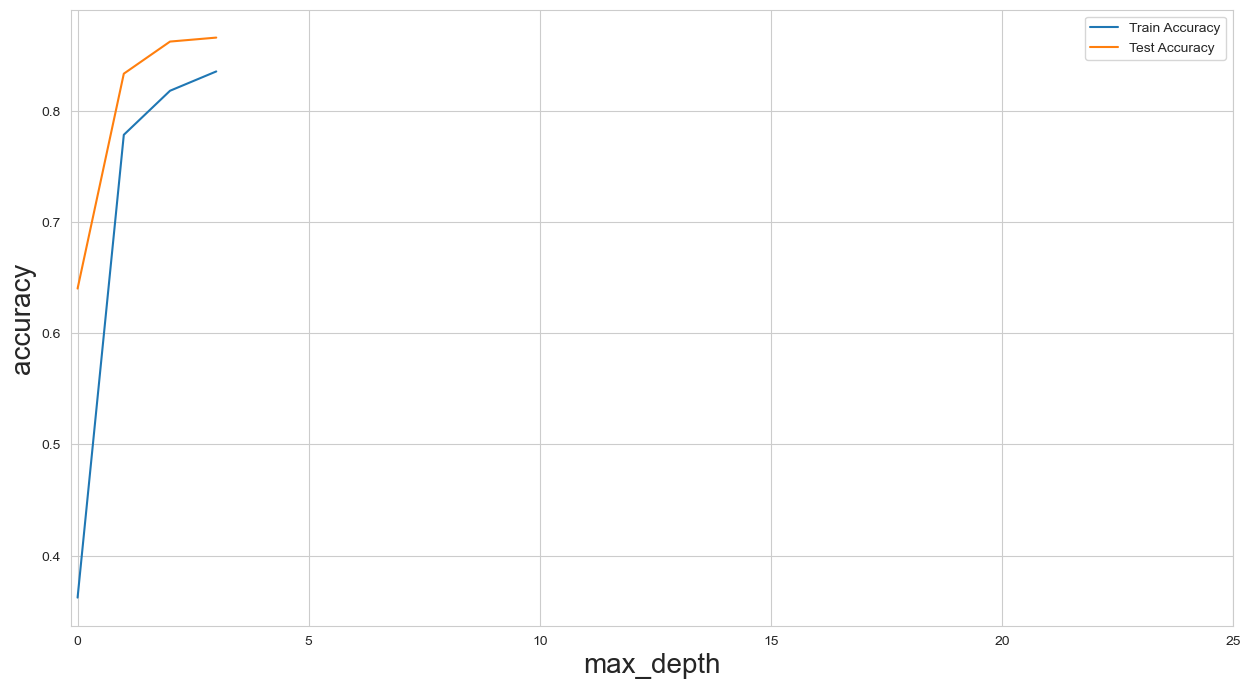

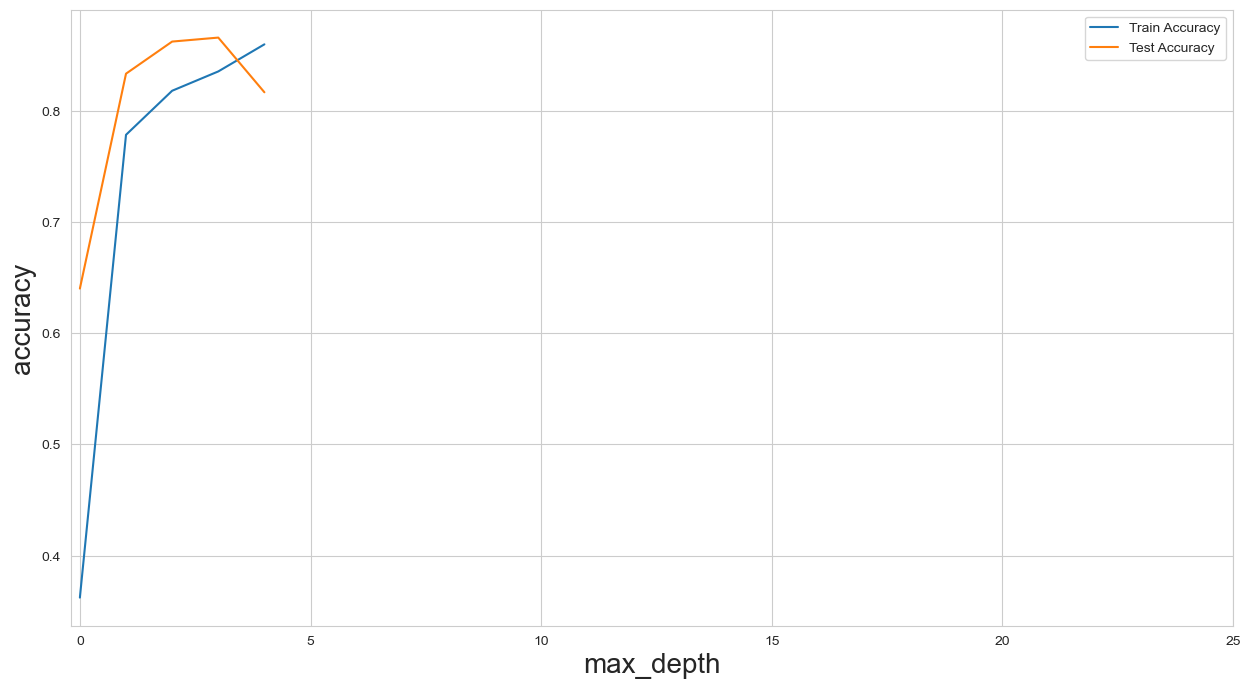

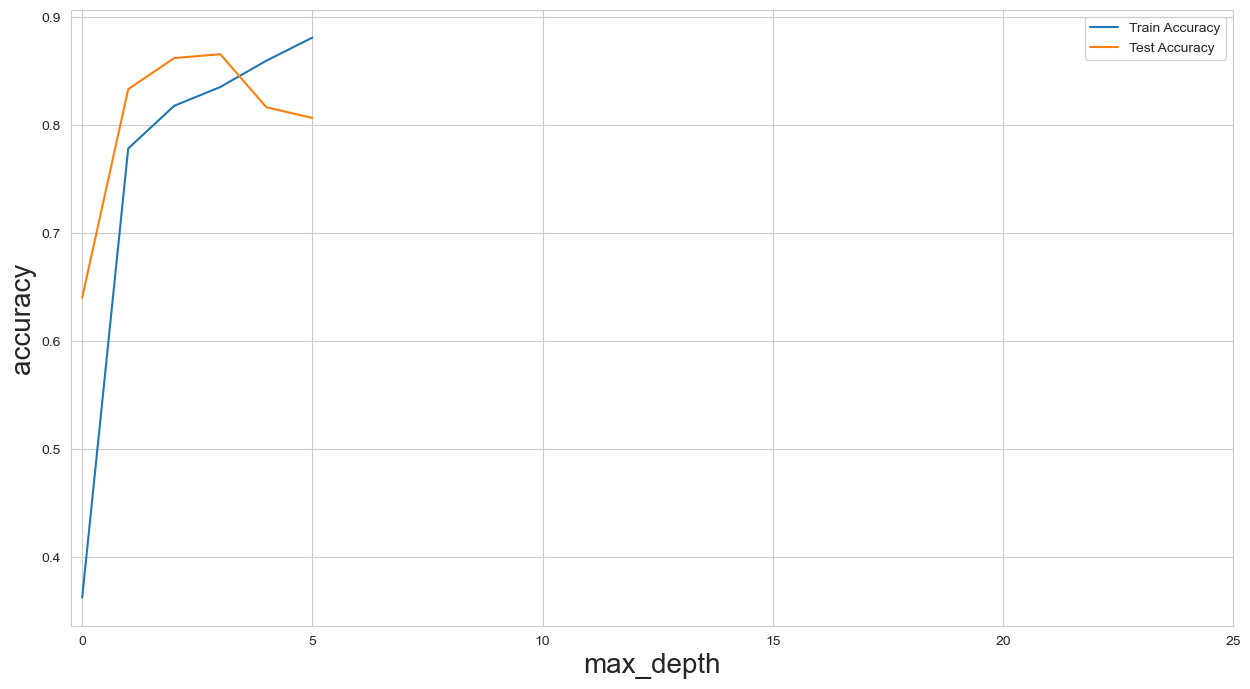

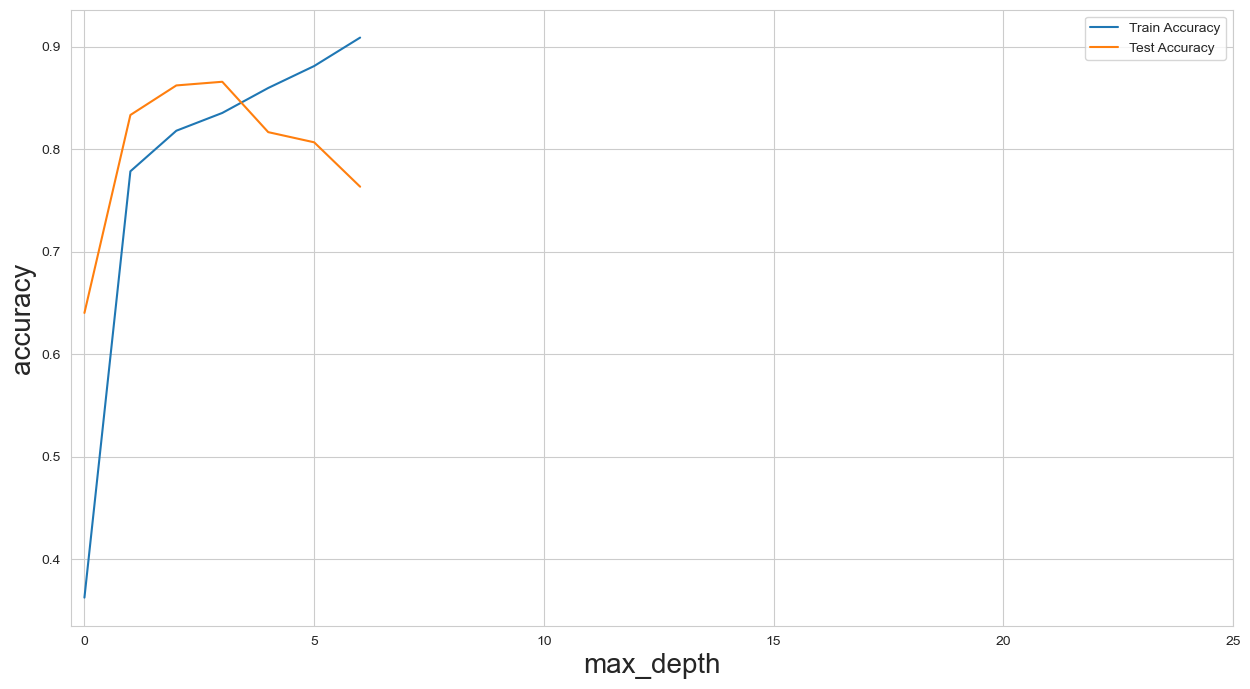

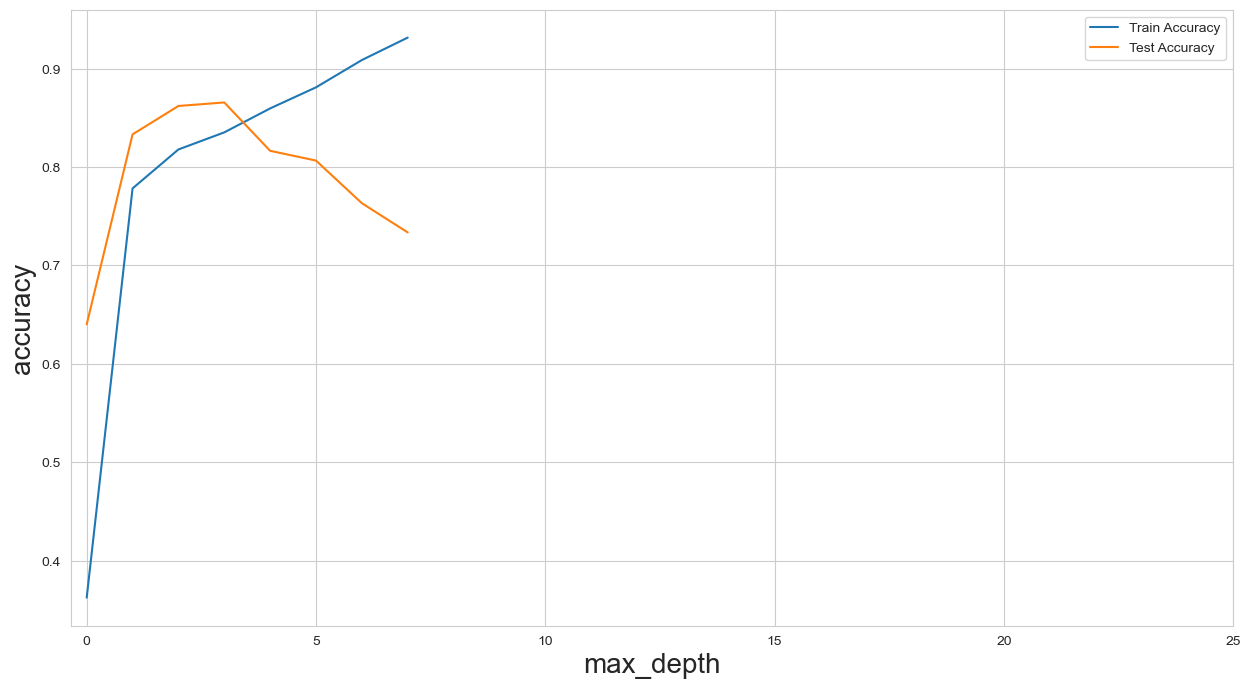

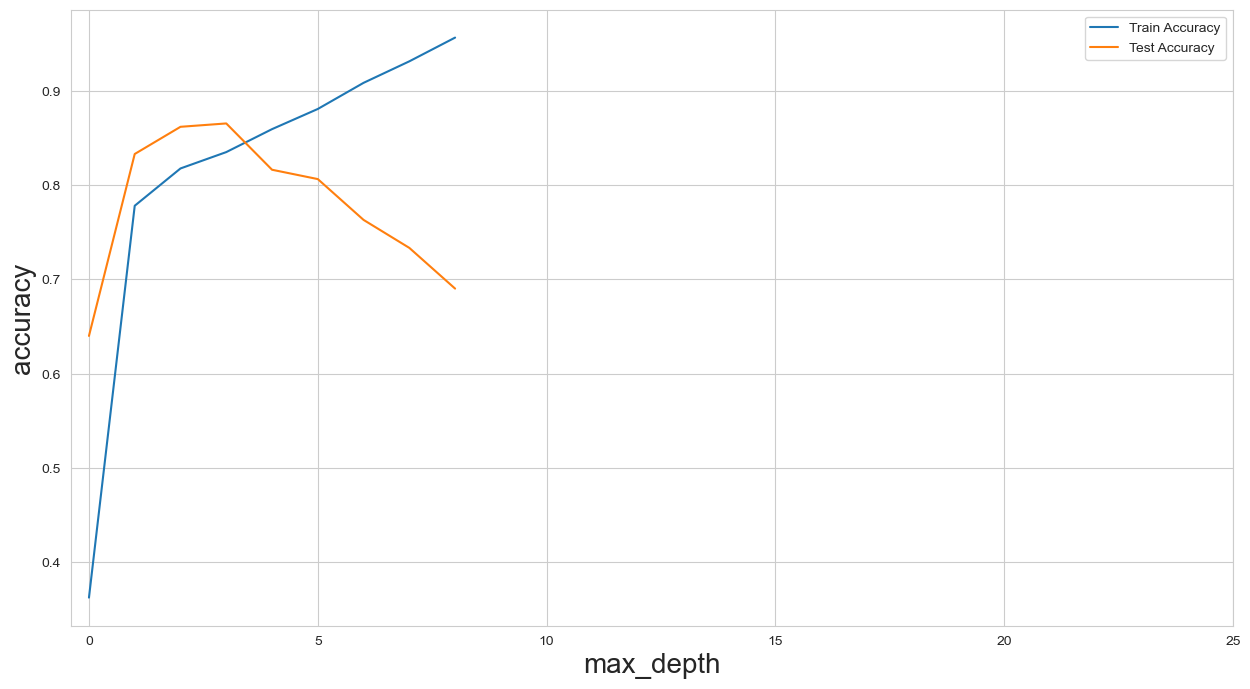

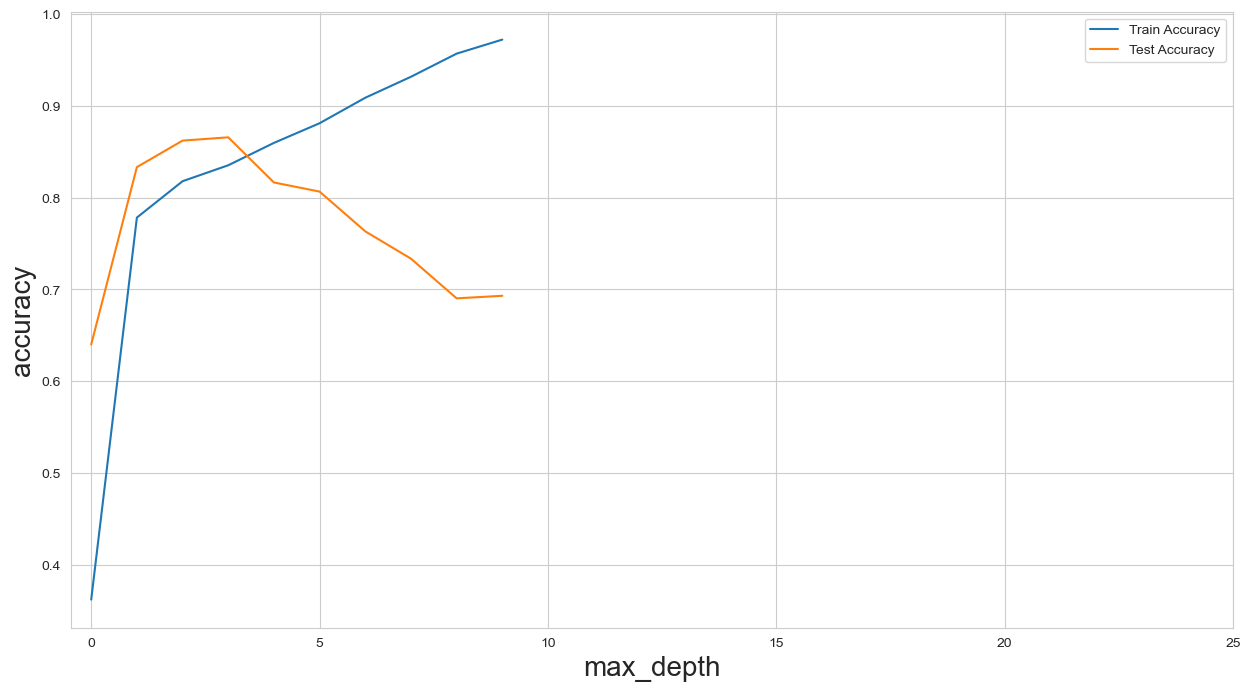

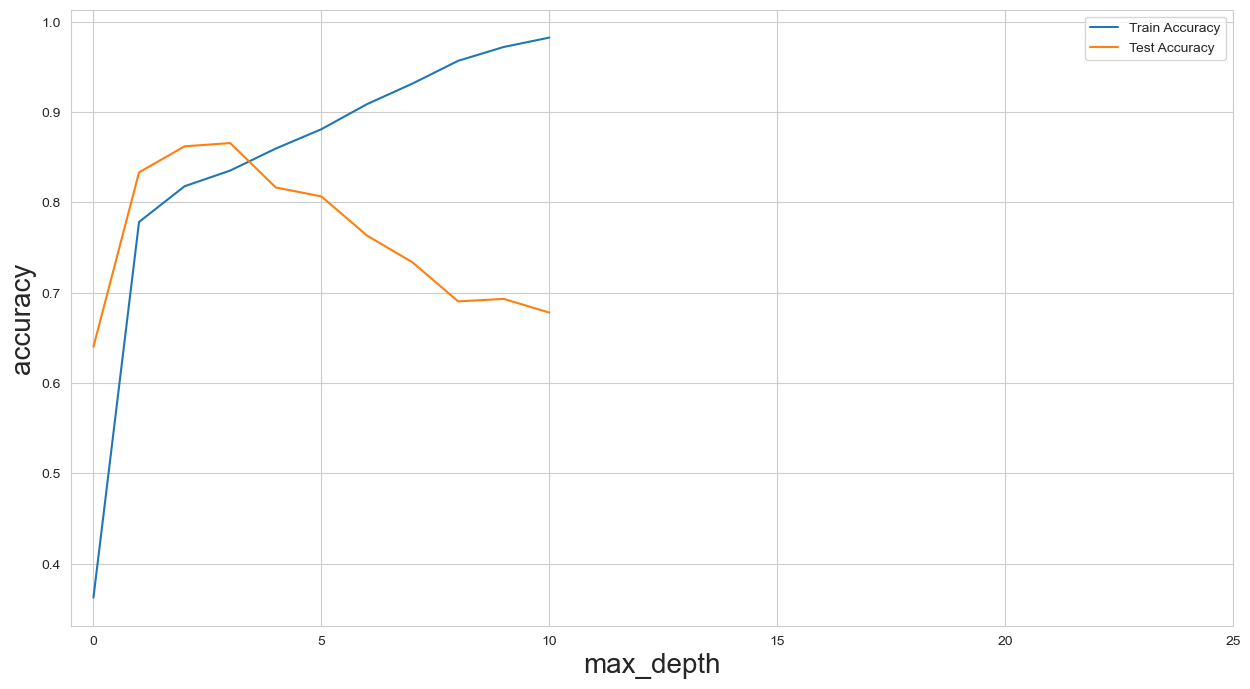

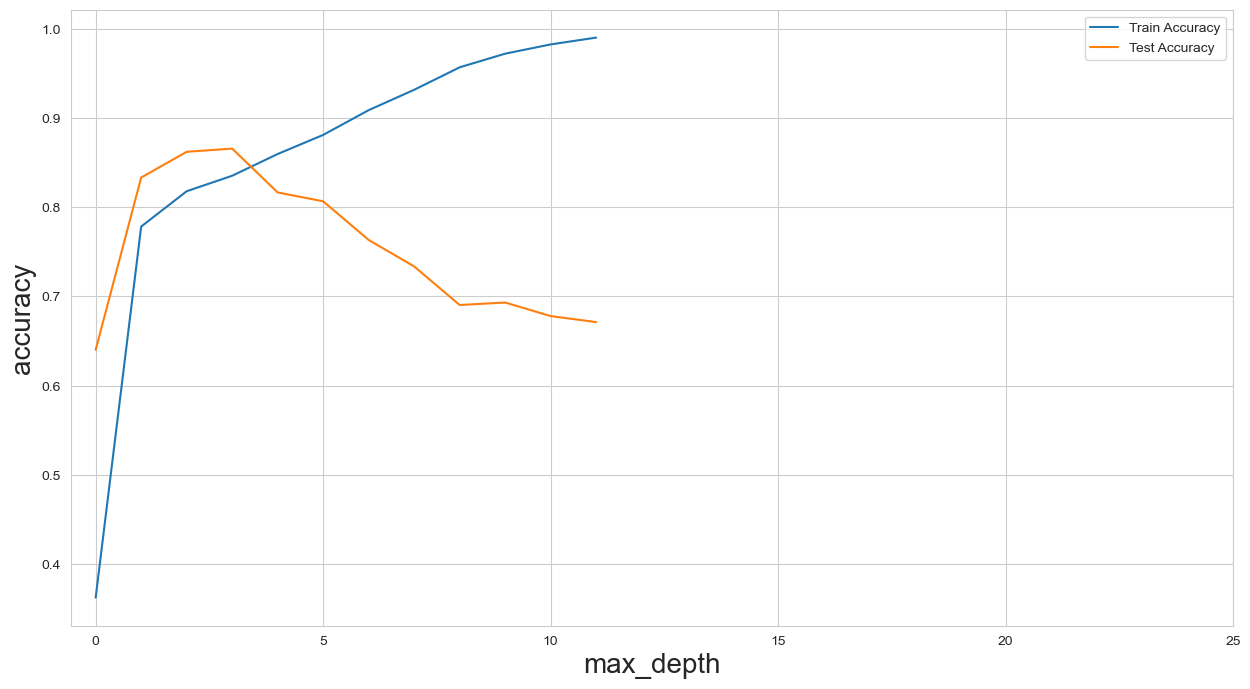

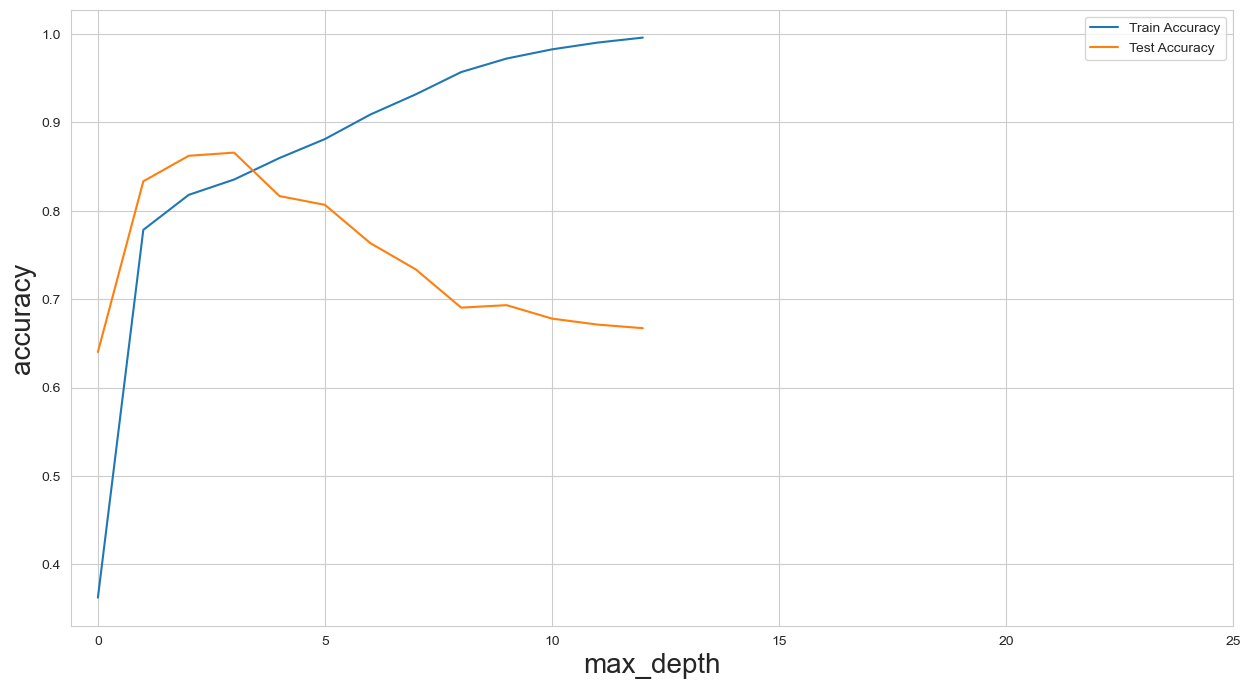

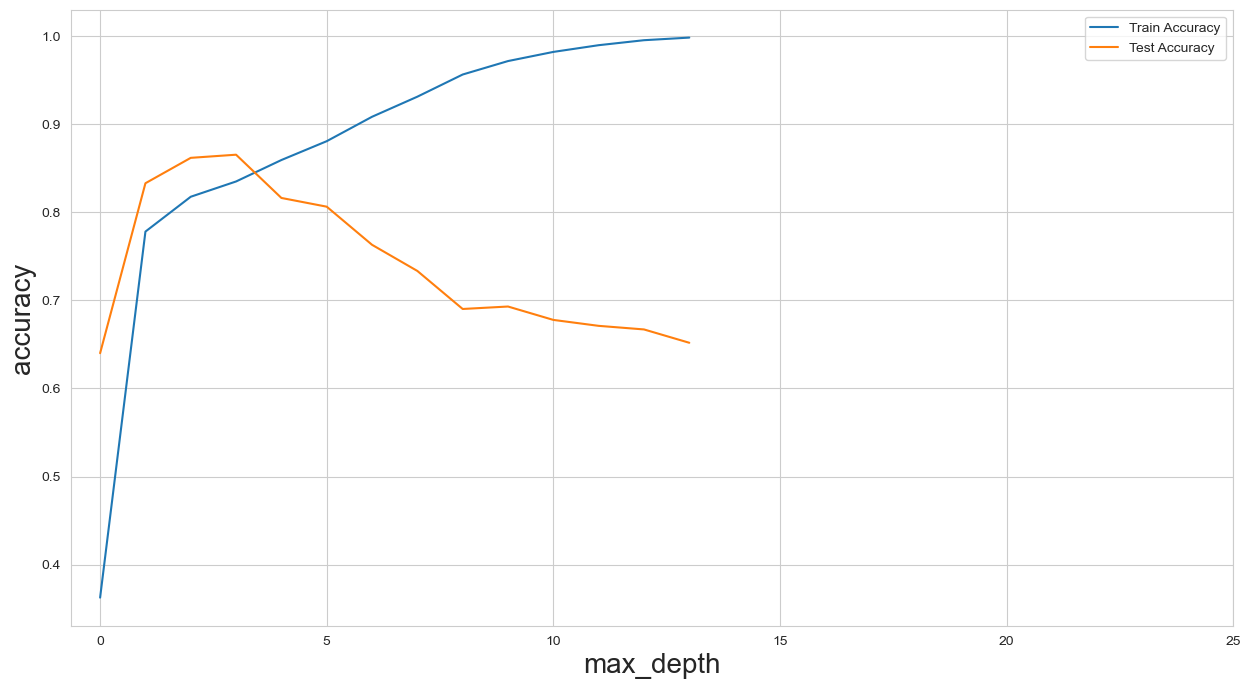

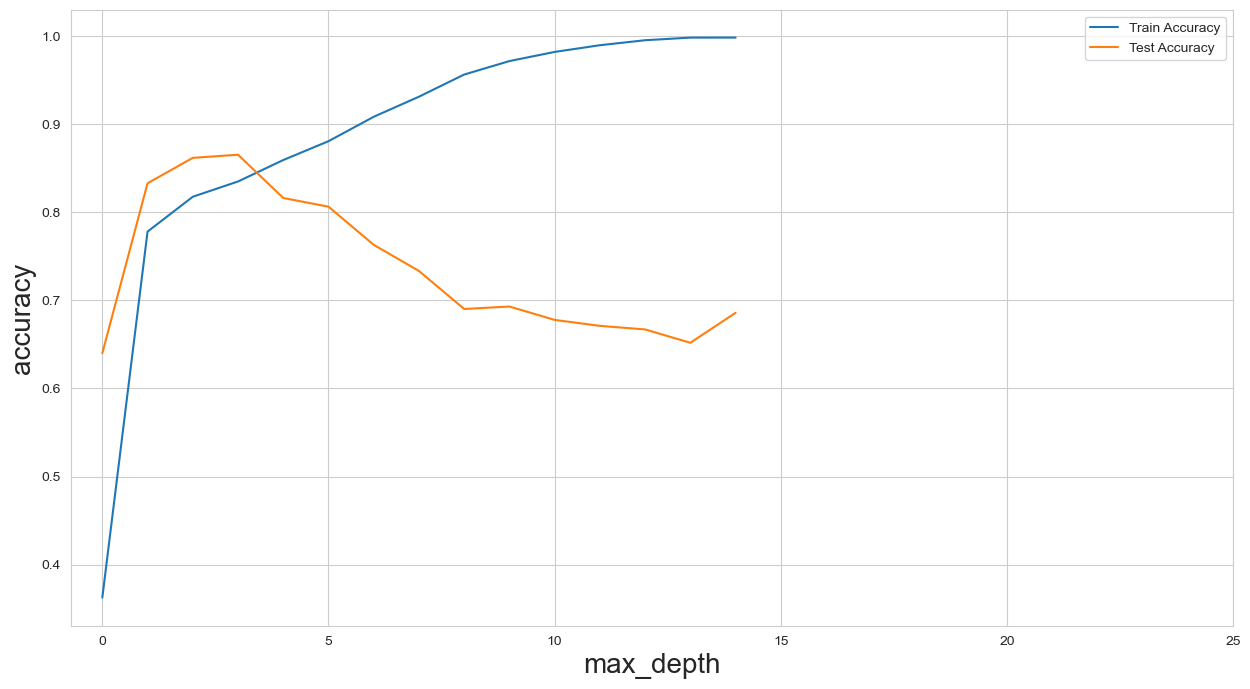

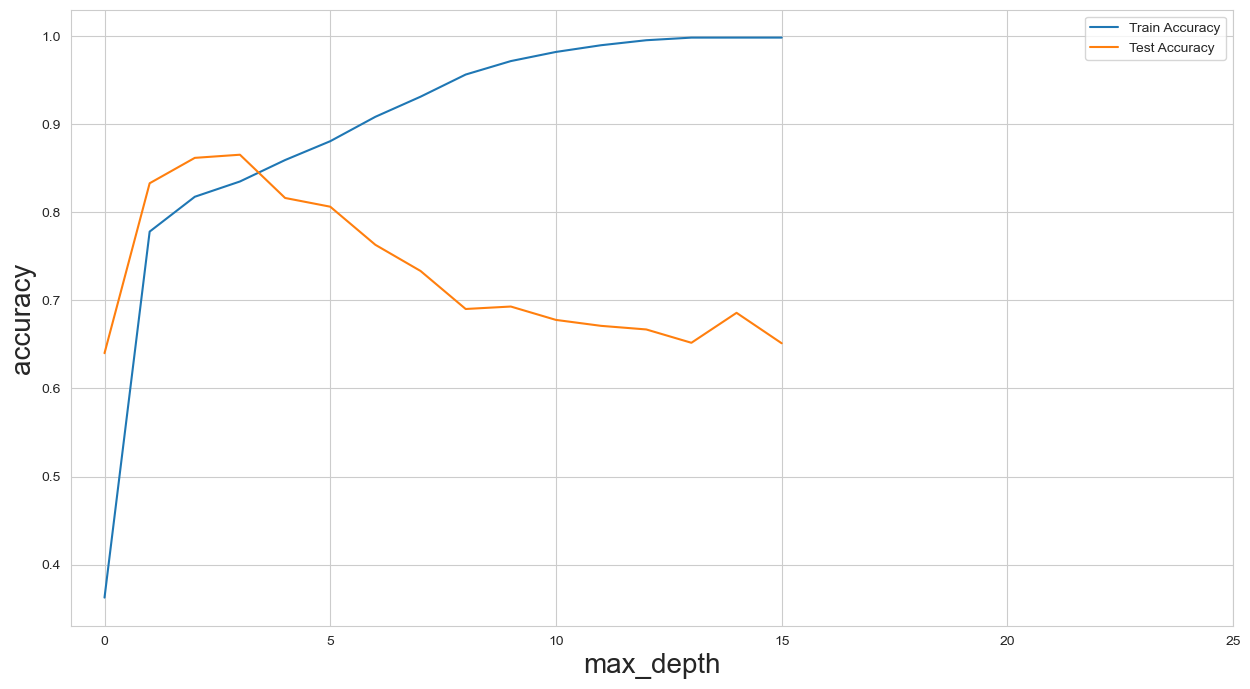

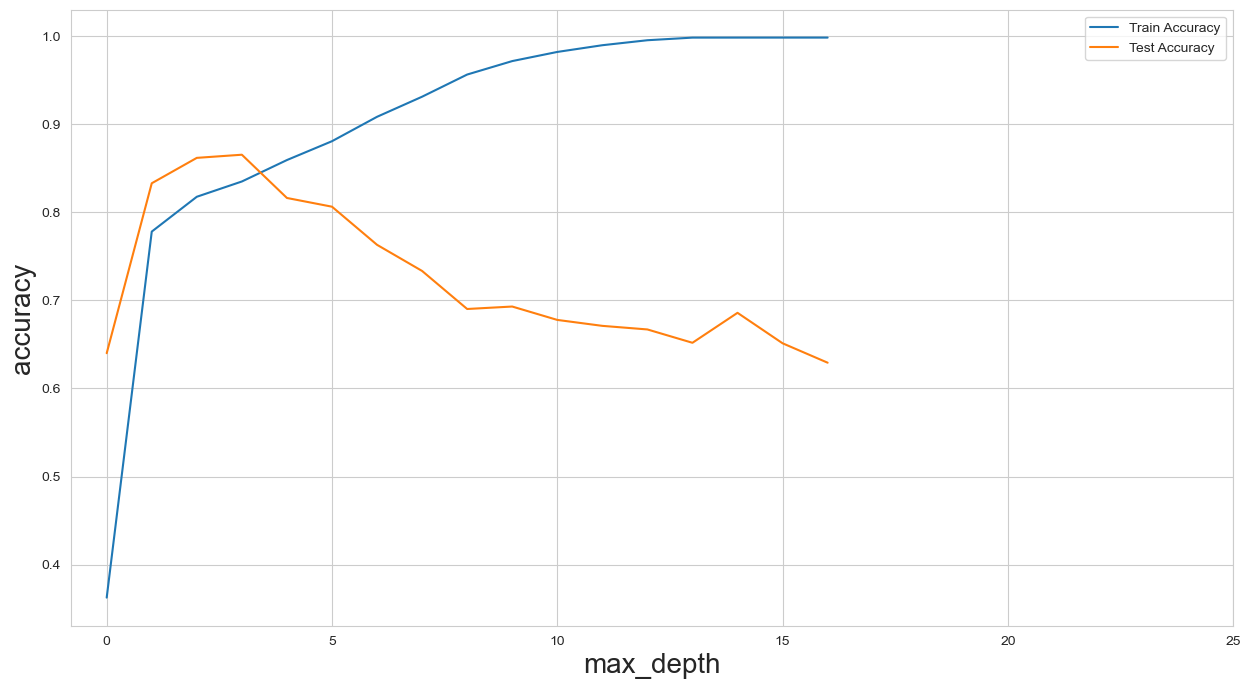

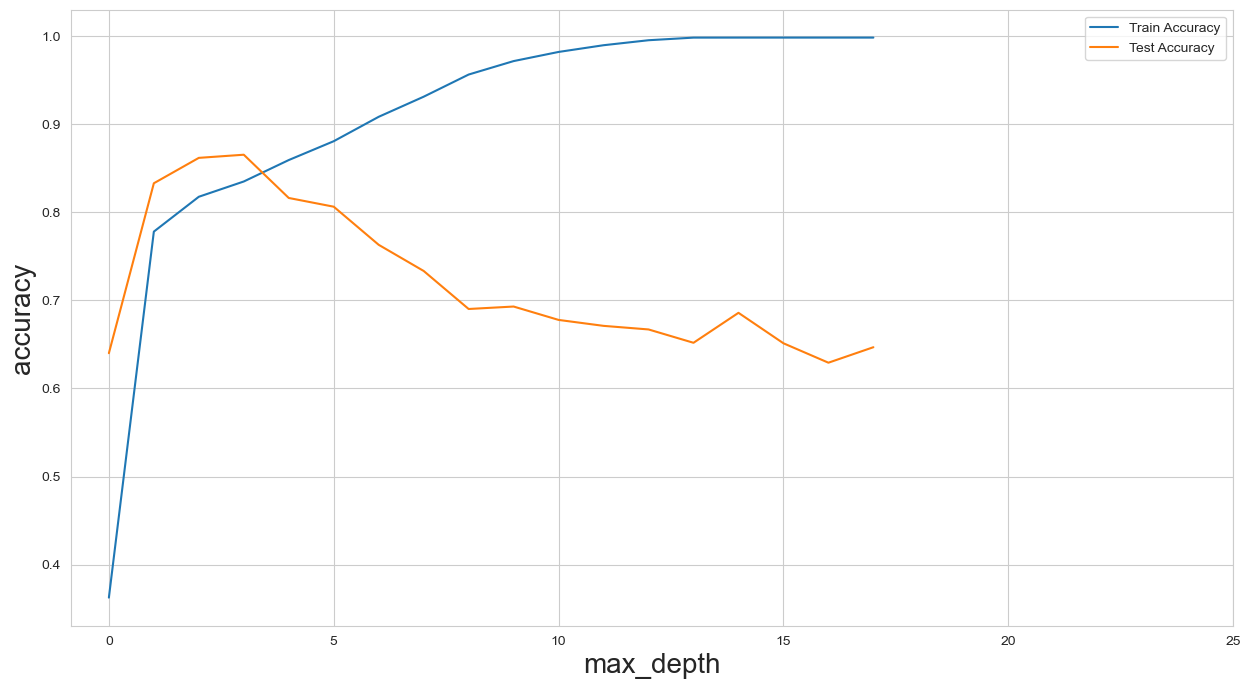

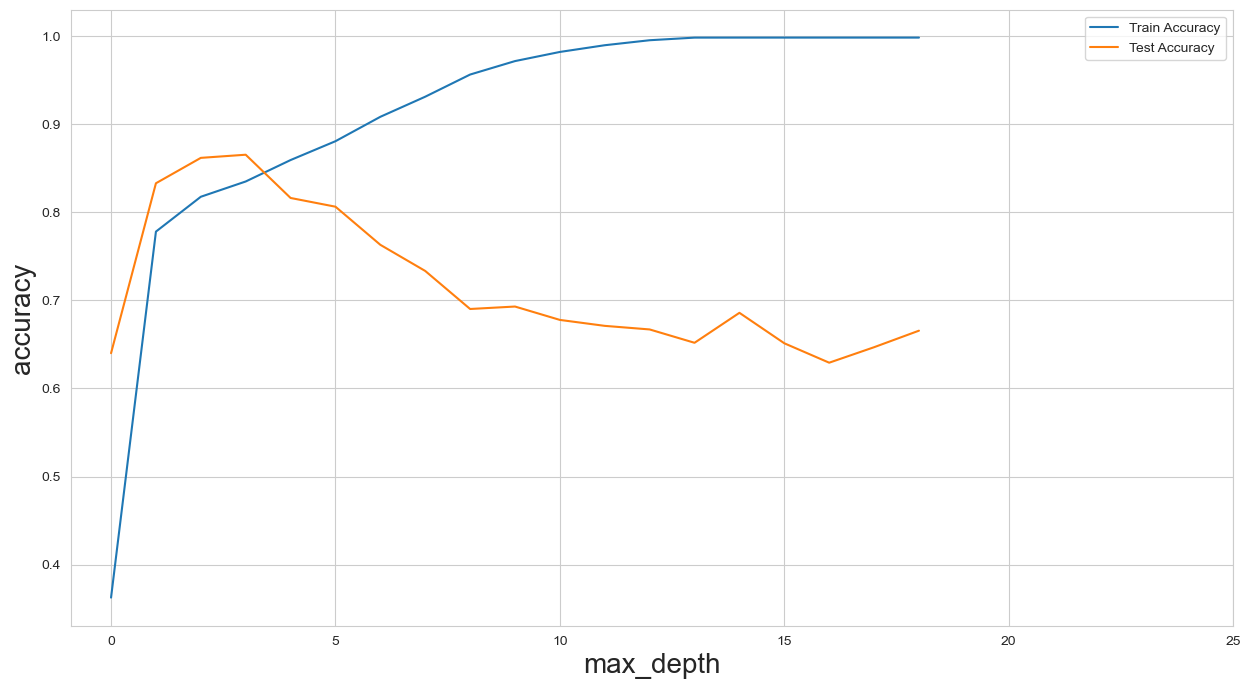

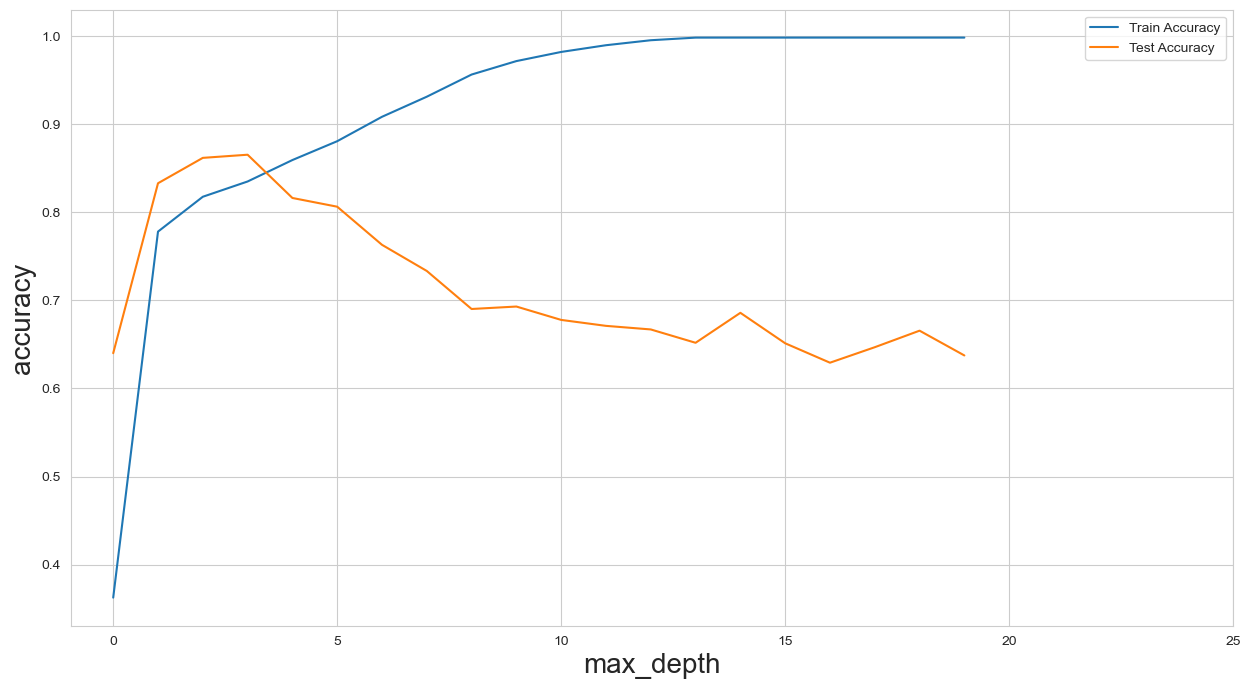

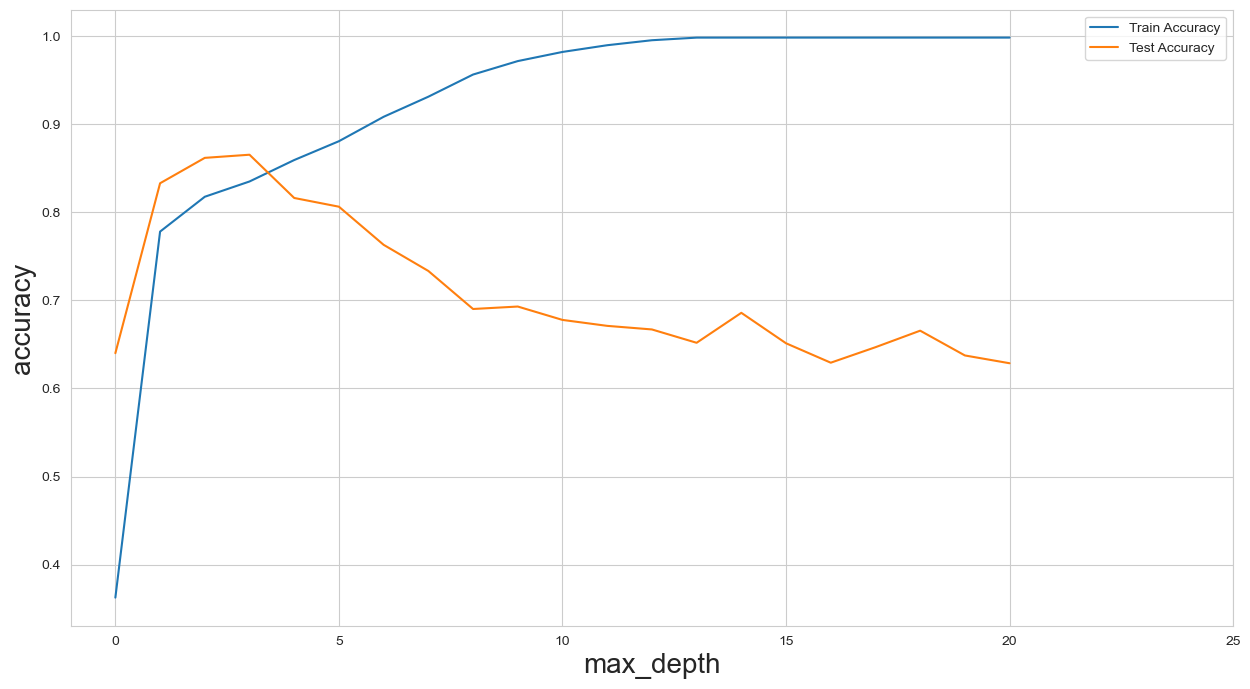

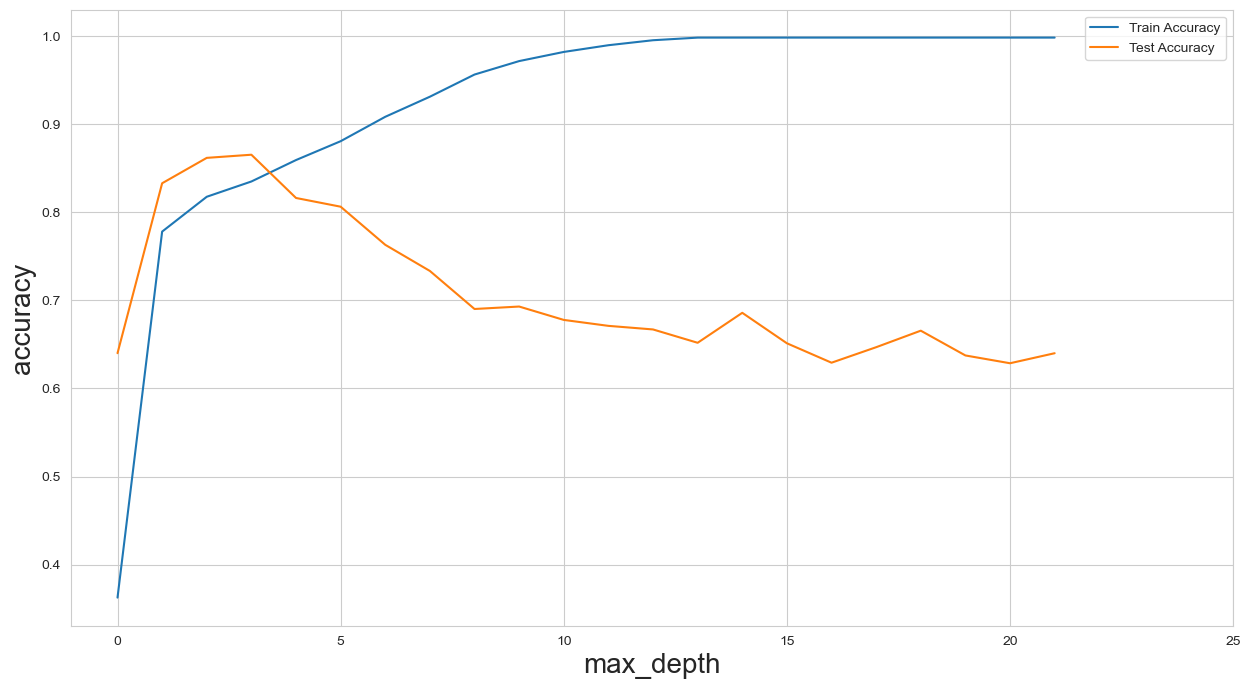

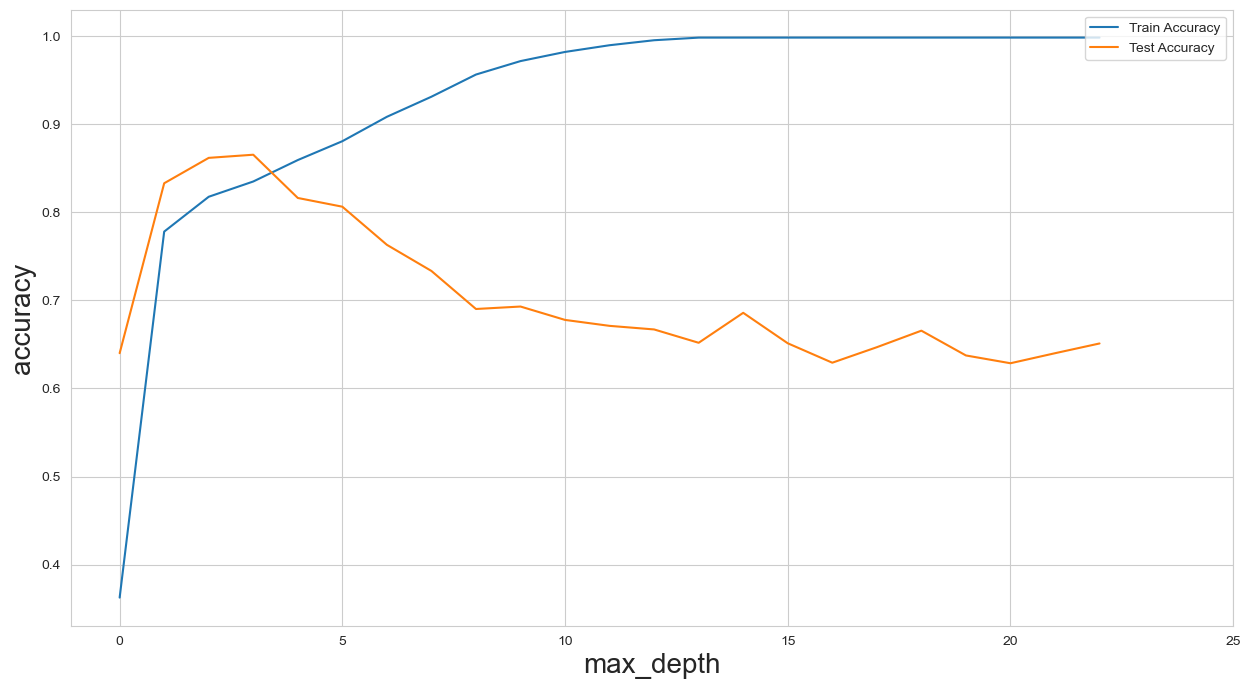

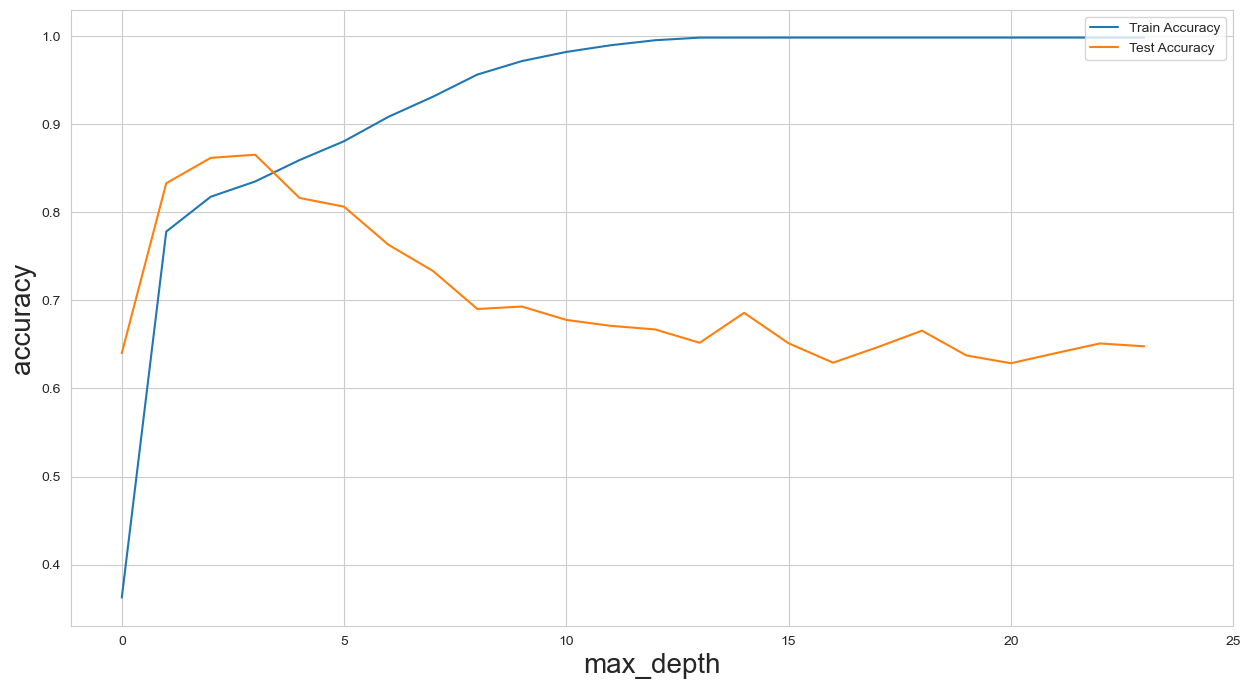

In [28]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score

train_accuracies = []
test_accuracies = []

#iterate over a few depth values
for depth in range(1, 25):
    tree_model = DecisionTreeRegressor(max_depth=depth)

    #for the model on given features
    tree_model.fit(X_train, y_train)

    #Create training and test predictions
    train_predictions = tree_model.predict(X_train)
    test_predictions = tree_model.predict(X_test)

    #Calculating training and test accuracies
    train_accuracy = r2_score(train_predictions, y_train)

    test_accuracy = r2_score(y_test, test_predictions)


    #append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    #plot
    plt.figure(figsize=(15,8))
    sns.set_style('whitegrid')
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.legend(loc = 'upper right')
    plt.xticks(range(0, 26, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)
    plt.show()

###### <font color ='orange'> Based on the analysis of the visualization, we observe that the Decision Tree model's performance on the validation set improves as the maximum depth of the tree increases from 1 to 3. <br> However, beyond a maximum depth of 3, the model's performance on the validation set decreases, indicating that the model is overfitting on the training data. <br> Therefore, we conclude that when max_depth hyperparameter is set to 3 the Decision Tree Model is optimized to achieve a balance between underfitting and overfitting.

In [29]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train, y_train)
model.append('DT')
print('DecisionTreeRegressor Train Score is: ', DT.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is: ', DT.score(X_test, y_test))
test_score.append(DT.score(X_test, y_test))

DecisionTreeRegressor Train Score is:  0.8459063637396539
DecisionTreeRegressor Test Score is:  0.86202998098235


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
model.append('GDBR')
print('GradientBoostRegressor Train Score is: ', reg.score(X_train, y_train))
print('GradientBoostRegressor Test Score is: ', reg.score(X_test, y_test))
test_score.append(reg.score(X_test, y_test))

GradientBoostRegressor Train Score is:  0.8950229722401575
GradientBoostRegressor Test Score is:  0.8733272194232818


In [31]:
Models = pd.DataFrame(model, columns=['Models'])
Test_accuracy = pd.DataFrame(test_score, columns=['Test Accuracy'])

In [32]:
pd.concat([Models, Test_accuracy], axis =1)

,Models,Test Accuracy
0,Linear Regression,0.779002
1,DT,0.862030
2,GDBR,0.873327


##### <font color = 'orange'> We will employ the GradientBoost Regressor Model to predict Medical Insurance Costs.

In [33]:
new_y_pred = reg.predict(X_test)
new_predicted_df = pd.DataFrame(y_pred, columns = ['GDBR Predicted Costs'])
new_predicted_df['Actual Costs'] = y_test.values

In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
# Mean Absolute Error:
MAE = mean_absolute_error(y_test, new_y_pred, multioutput='uniform_average')
print("Mean Absolute Error is : ", MAE)

#MeaN Absolute Percentage
mape = mean_absolute_percentage_error(y_test, new_y_pred)
print('Mean Absolute Percentage error is : ', mape)

#Mean Squared Error
mse = mean_squared_error(y_test, new_y_pred, multioutput='uniform_average')
print("Mean Squared Error is: ", mse)

#Median Absolute Error
mabe = median_absolute_error(y_test, new_y_pred)
print('Median Absolute Error is: ', mabe)

#r2_score
rs = r2_score(y_test, new_y_pred)
print('r2_score is: ', rs)

Mean Absolute Error is :  2564.2123022636847
Mean Absolute Percentage error is :  0.30585415016592643
Mean Squared Error is:  18392595.111492686
Median Absolute Error is:  1450.25571060815
r2_score is:  0.8733272194232818


In [41]:
y_pred = DT.predict(X_test)
predicted_df = pd.DataFrame(y_pred, columns=['Predicted Costs'])
predicted_df['Actual Costs'] = y_test.values

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [44]:
# Mean Absolute Error:
MAE = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print("Mean Absolute Error is : ", MAE)

#MeaN Absolute Percentage
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage error is : ', mape)

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print("Mean Squared Error is: ", mse)

#Median Absolute Error
mabe = median_absolute_error(y_test, y_pred)
print('Median Absolute Error is: ', mabe)

#r2_score
rs = r2_score(y_test, y_pred)
print('r2_score is: ', rs)

Mean Absolute Error is :  2812.1625389819815
Mean Absolute Percentage error is :  0.3451312665306224
Mean Squared Error is:  20032928.035235584
Median Absolute Error is:  1812.1509726082663
r2_score is:  0.86202998098235


In [45]:
predicted_df

,Predicted Costs,Actual Costs
0,3457.949988,1826.84300
1,6257.069554,20177.67113
2,10424.044890,7421.19455
3,3457.949988,1877.92940
4,18849.256457,15518.18025
...,...,...
397,3457.949988,1727.54000
398,6257.069554,4433.38770
399,6257.069554,4618.07990
400,6257.069554,4320.41085


In [46]:
new_predicted_df

,GDBR Predicted Costs,Actual Costs
0,1682.59700,1826.84300
1,4058.71245,20177.67113
2,7419.47790,7421.19455
3,1622.18850,1877.92940
4,16450.89470,15518.18025
...,...,...
397,2730.10785,1727.54000
398,4433.91590,4433.38770
399,13126.67745,4618.07990
400,4402.23300,4320.41085


In [47]:
import pickle
#pickle.dump(DT, open('Med_Cost_model.pkl', 'wb'))
pickle.dump(reg, open('GDBR_Insu_model.pkl', 'wb'))

In [49]:
df3

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [51]:
new_data = (18, 1, 33.77, 1, 0, 0, 0, 1, 0)
#changing the new_data to numpy array
new_data_as_numpy_array = np.asarray(new_data)

#reshape the array as we are predicting for one instance
new_data_reshaped = new_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(new_data_reshaped)
print('Potential Insurance Cost is: ', prediction)


Potential Insurance Cost is:  [31174.70127078]
